Which country is the happiest in the world?<br>2019: Finland<br>
2018: Finland<br>
2017: Norway<br>
2016: Denmark<br>
2015: Switzerland<br><br>
What are the most important contributing factors to a nation’s happiness?<br> 1)GDP per capita<br> 2)Social Support/Family<br> 3)Healthy life expectancy<br> 4)Freedom<br><br>
Is overall happiness increasing or decreasing? <br> Decreasing between 2015-2017, increasing after 2017.

In [170]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
#dataset is from https://www.kaggle.com/datasets/unsdsn/world-happiness
db_2015 = pd.read_csv('2015.csv')
db_2016 = pd.read_csv('2016.csv')
db_2017 = pd.read_csv('2017.csv')
db_2018 = pd.read_csv('2018.csv')
db_2019 = pd.read_csv('2019.csv')
db = [db_2019, db_2018, db_2017, db_2016, db_2015]
year = ['2019', '2018', '2017', '2016', '2015']
score = ['Score', 'Score', 'Happiness.Score', 'Happiness Score', 'Happiness Score']

In [172]:
for curr_year,curr_db in zip(year,db):
    print(curr_year)
    print(curr_db.isna().sum().sum())

2019
0
2018
1
2017
0
2016
0
2015
0


In [173]:
db_2018.fillna(value=db_2018['Perceptions of corruption'].mean(),inplace=True)

In [174]:
for i,y,s in zip(db, year, score):
    country_str = [country for country in list(i.keys()) if country.startswith('Country')]
    print('Most happy country in ' + y + ": " + i[country_str[0]][0])
    print('Average happiness in ' + y +': ' + str(i[s].mean().round(3))+'\n')

Most happy country in 2019: Finland
Average happiness in 2019: 5.407

Most happy country in 2018: Finland
Average happiness in 2018: 5.376

Most happy country in 2017: Norway
Average happiness in 2017: 5.354

Most happy country in 2016: Denmark
Average happiness in 2016: 5.382

Most happy country in 2015: Switzerland
Average happiness in 2015: 5.376



In [175]:
def pairgrid_with_reg_hist(data, rank_col_name):
    sns.set_style("whitegrid")
    sns.set_context("notebook")
    g = sns.PairGrid(data.drop(rank_col_name,axis=1))
    g.map_lower(sns.regplot, order=1, scatter_kws={"alpha":0.5}, line_kws={"color":"orange"})
    g.map_upper(sns.regplot, order=2, scatter_kws={"alpha":0.5}, line_kws={"color":"orange"})
    g.map_diag(sns.histplot)
    g.fig.suptitle("Pairgrid with Regression and Histograms",fontsize=20, y=1.01)
    plt.show()

In [176]:
 def regs_with_score_factor(data, rank_col_name, score_col_name, country_col_name, extra_cols=None):
    if extra_cols == None:
        extra_cols = []
    x_vars = data.columns.to_list()
    x_vars.remove(rank_col_name)
    x_vars.remove(score_col_name)
    x_vars.remove(country_col_name)
    for col in extra_cols:
        x_vars.remove(col)
    g = sns.PairGrid(data,y_vars=x_vars, x_vars=score_col_name, height=6)
    g.map(sns.regplot, order=2, scatter_kws={"alpha":0.5}, line_kws={"color":"orange"})
    g.map(sns.regplot, order=1, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
    g.fig.suptitle("1st and 2nd order Regression\n with Score and Factors", fontsize=20,y=1.005)
    plt.show()
    return x_vars

In [177]:
def density_with_factor_score(data, x_vars, score_col_name):
    fig,ax = plt.subplots(2,3,figsize=(15,10), sharey=True)
    for i in range(len(x_vars)):
        sns.histplot(data,x=x_vars[i],y=score_col_name, ax=ax[i//3][i%3], cbar=True)
    fig.suptitle("Density of # Countries According to Factors and Score",fontsize=20)
    plt.show()

In [178]:
def corr_factor_heatmap(data, x_vars):
    data[x_vars].corr()
    sns.set_palette("rocket")
    sns.set(rc = {'figure.figsize':(10,10)})
    sns.heatmap(data[x_vars].corr(),cbar=True,annot=True,cmap=sns.color_palette("rocket", as_cmap=True),mask=np.triu(np.ones((6,6)))).set_title("Correlation Heatmap of Factors",fontsize=20)

In [179]:
def dist_countries_acc_factors(data, x_vars):
    fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
    for i in range(len(x_vars)):
        sns.histplot(data, x=x_vars[i], ax=ax[i // 3][i % 3])
    fig.suptitle("Distribution of Countries According to Factors",fontsize=20)
    plt.show()

In [180]:
def mean_and_std_factors(data,rank_col_name, score_col_name):
    sns.barplot(data.drop([rank_col_name,score_col_name],axis=1),errorbar='sd').set_title("Means and Standard Deviations of Factors",fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

In [181]:
def first_last_ten_compare(data, rank_col_name, score_col_name):
    db_first_ten = data.drop([rank_col_name,score_col_name],axis=1)[:10]
    db_last_ten =data.drop([rank_col_name,score_col_name],axis=1)[-10:]
    sns.barplot(db_first_ten, color='red',alpha=0.5)
    sns.barplot(db_last_ten, color='blue', alpha=0.5).set_title("Comparison of First Ten and Last Ten Countries",fontsize=20)
    plt.xticks(rotation=45)
    leg = plt.legend(title='Country rank', loc='upper right', labels=['First Ten', 'Last Ten'])
    leg.legendHandles[0].set_color('red')
    leg.legendHandles[1].set_color('purple')
    plt.show()

In [182]:
def print_first_last(data):
    first = data.iloc[0]
    last = data.iloc[-1]
    print(first,'\n',last)

In [183]:
def first_last_two_compare(data, x_vars, factor_start_index):
    first = data.iloc[0]
    last = data.iloc[-1]
    fig ,ax = plt.subplots(figsize=(10,10))
    ax.plot(x_vars, first[factor_start_index:],marker='o',color='blue',markersize=10)
    ax.plot(x_vars, data.iloc[1,factor_start_index:],marker='o',color='purple', markersize=10)
    ax.plot(x_vars, data.iloc[-2,factor_start_index:],marker='o',color='red', markersize=10)
    ax.plot(x_vars, last[factor_start_index:], marker='o', color='orange', markersize=10)
    ax.legend(labels=[first[1],data.iloc[1,1],data.iloc[-2,1],last[1]])
    plt.xticks(rotation=45)
    plt.title("Differences between first two and last two countries",fontsize=20)
    plt.show()

In [184]:
def corr_with_score(data, rank_col_name, score_col_name):
    a = data.drop(rank_col_name,axis=1).corr()
    print(a[score_col_name].sort_values(ascending=False)[1:].round(3))
    plt.plot(a[score_col_name].sort_values(ascending=False)[1:],marker='o')
    plt.title("Correlations with Score",fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

In [185]:
def graph_happ_cont(cont_name, col):
    fig, ax = plt.subplots(2,3,figsize=(30,20),sharey=True, sharex=True)
    plt.style.use('seaborn')
    sns.set_context('talk')
    def graph_year(index):
        plt.ylabel('Happiness')
        hue=None
        if 'Region' in db[index].columns:
            hue = 'Region'
        sns.scatterplot(x = score[index], y = col[index], data = db[index], ax=ax[index//3][index%3],hue=hue)
        slope, intercept = np.polyfit(db[index][score[index]],db[index][col[index]],1)
        ax[index//3][index%3].axline((0,intercept),slope=slope)
        ax[index//3][index%3].set_title(year[index])
        return slope
    infos = []
    for index in range(len(db)) :
        infos.append(graph_year(index))
    
    print('Slope (as a measure of contribution): ' + str(np.mean(infos).round(3)))
    plt.ylabel(cont_name)
    plt.legend(year, loc='upper left', prop={'size': 12})
    plt.show()
    plt.clf()

In [186]:
def create_graphs(data, rank_col_name, score_col_name, country_col_name, factor_start_index, extra_cols=None):
    if extra_cols is None:
        extra_cols = []
    #pairgrid_with_reg_hist(data, rank_col_name)
    x_vars = regs_with_score_factor(data, rank_col_name,score_col_name,country_col_name, extra_cols)
    density_with_factor_score(data, x_vars,score_col_name)
    corr_factor_heatmap(data, x_vars)
    dist_countries_acc_factors(data, x_vars)
    mean_and_std_factors(data, rank_col_name, score_col_name)
    first_last_ten_compare(data,rank_col_name, score_col_name)
    print_first_last(data)
    first_last_two_compare(data,x_vars, factor_start_index)
    corr_with_score(data,rank_col_name,score_col_name)

In [187]:
db_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [188]:
db_2019.tail()

Overall rank         Country or region  Score  GDP per capita  \
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091

In [189]:
db_2019.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

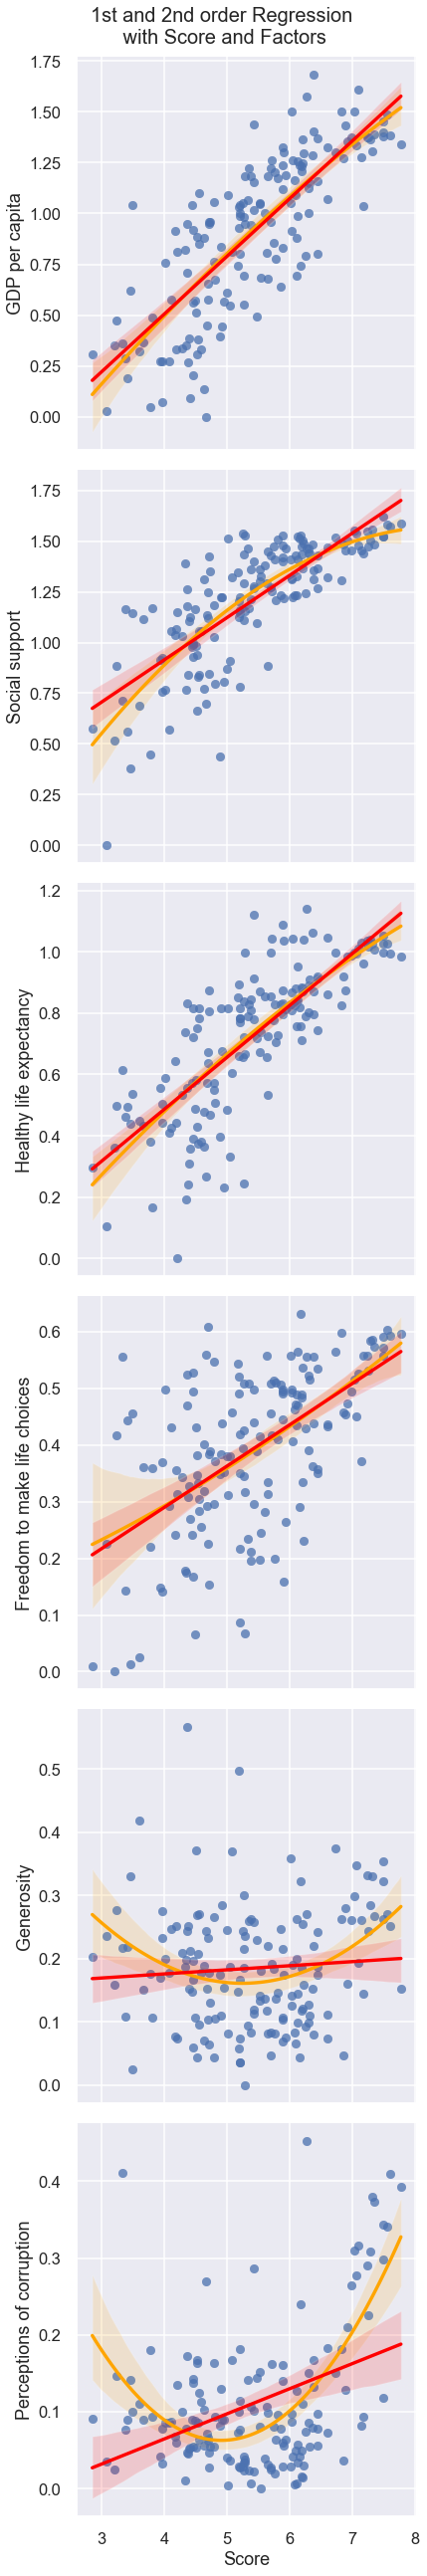

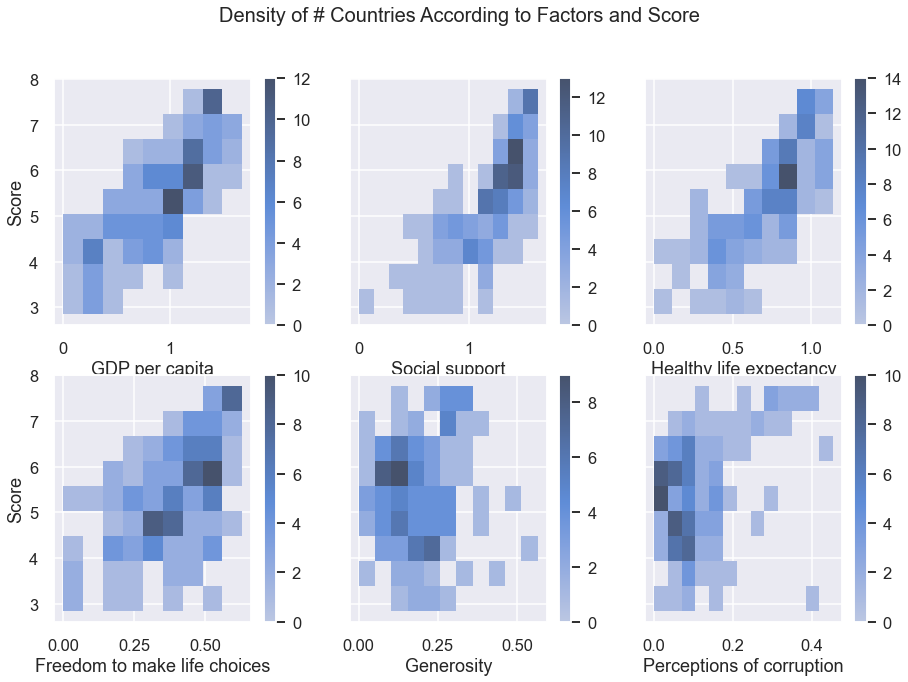

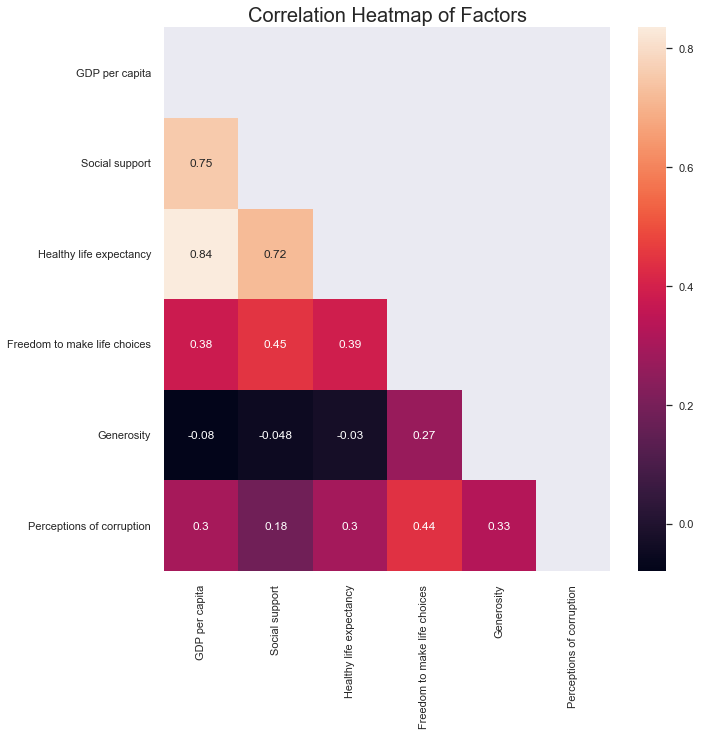

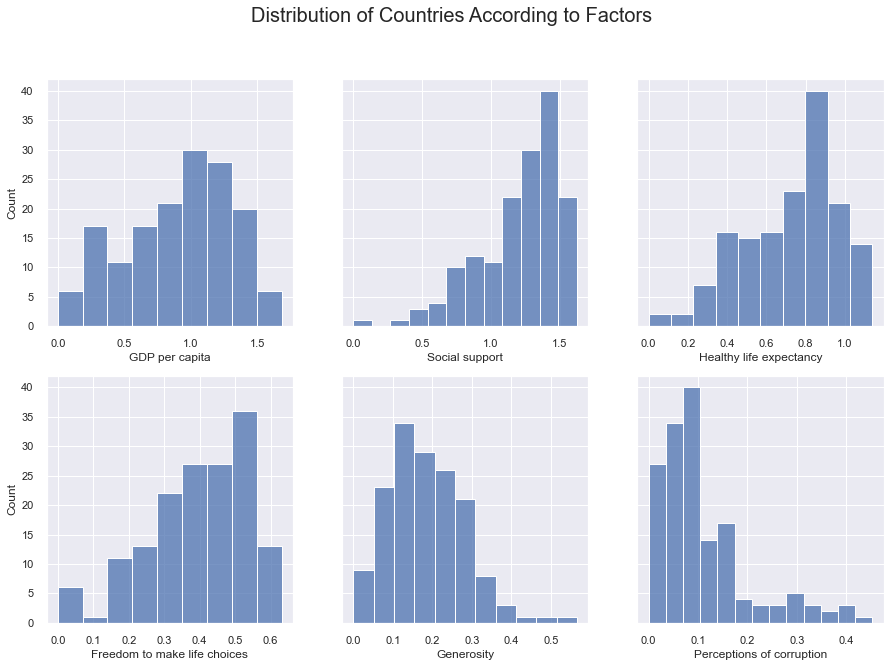

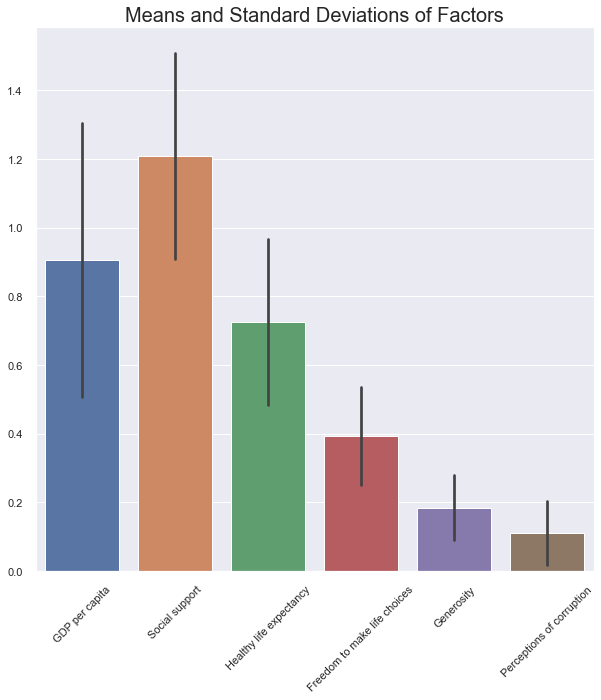

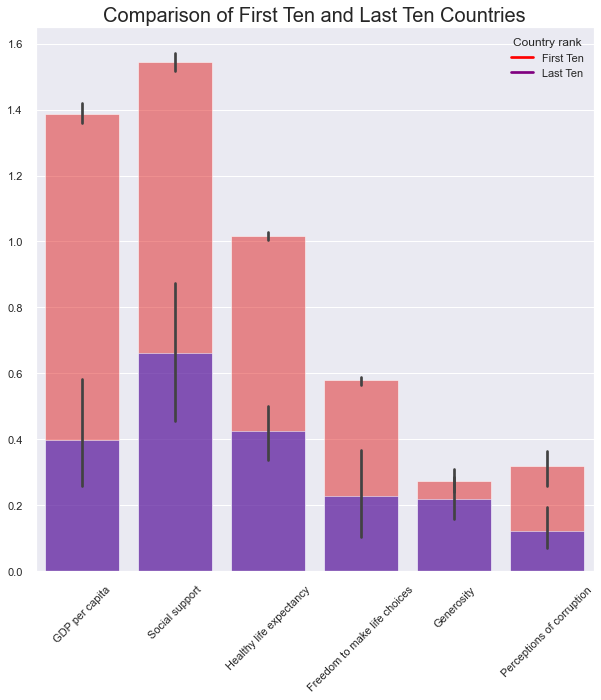

Overall rank                          1
Country or region               Finland
Score                             7.769
GDP per capita                     1.34
Social support                    1.587
Healthy life expectancy           0.986
Freedom to make life choices      0.596
Generosity                        0.153
Perceptions of corruption         0.393
Name: 0, dtype: object 
 Overall rank                            156
Country or region               South Sudan
Score                                 2.853
GDP per capita                        0.306
Social support                        0.575
Healthy life expectancy               0.295
Freedom to make life choices           0.01
Generosity                            0.202
Perceptions of corruption             0.091
Name: 155, dtype: object


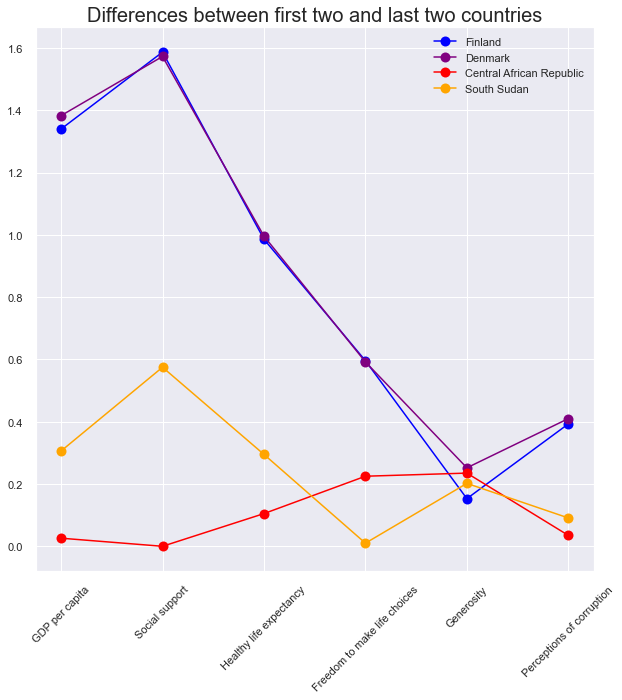

GDP per capita                  0.794
Healthy life expectancy         0.780
Social support                  0.777
Freedom to make life choices    0.567
Perceptions of corruption       0.386
Generosity                      0.076
Name: Score, dtype: float64


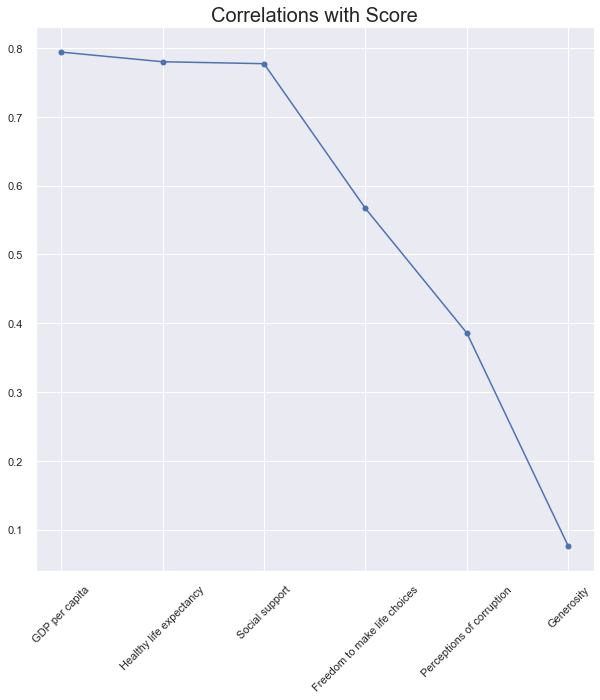

In [190]:
create_graphs(db_2019,"Overall rank","Score", "Country or region", 3)

In [191]:
db_2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [192]:
db_2018.tail()

Overall rank         Country or region  Score  GDP per capita  \
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           1.073                    0.343                         0.244   
152           0.991                    0.381                         0.481   
153           0.608                    0.177                         0.112   
154           0.000                    0.010                         0.305   
155           0.627                    0.145                         0.065   

     Generosity  Perceptions of corruption  
151       0.083                      0.064  
152       0.270                      0.097  
153       0.224                      0.106  
154       0.218                      0.038  
155       0.149                      0.076

In [193]:
db_2018.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%                   0.422250                      0.356000    0.109500   
50%                   0.644000                      0.487000    0.174000   
75%                   0.777250                      0.578500    0.239000   
max                   1.030000                      0.724000    0.598000   

       Perceptions of corruption  
count                  156.00000  
mean                     0.11200  
std                      0.09618  
min                      0.00000  
25%                      0.05100  
50%                      0.08200  
75%                      0.13650  
max                      0.45700

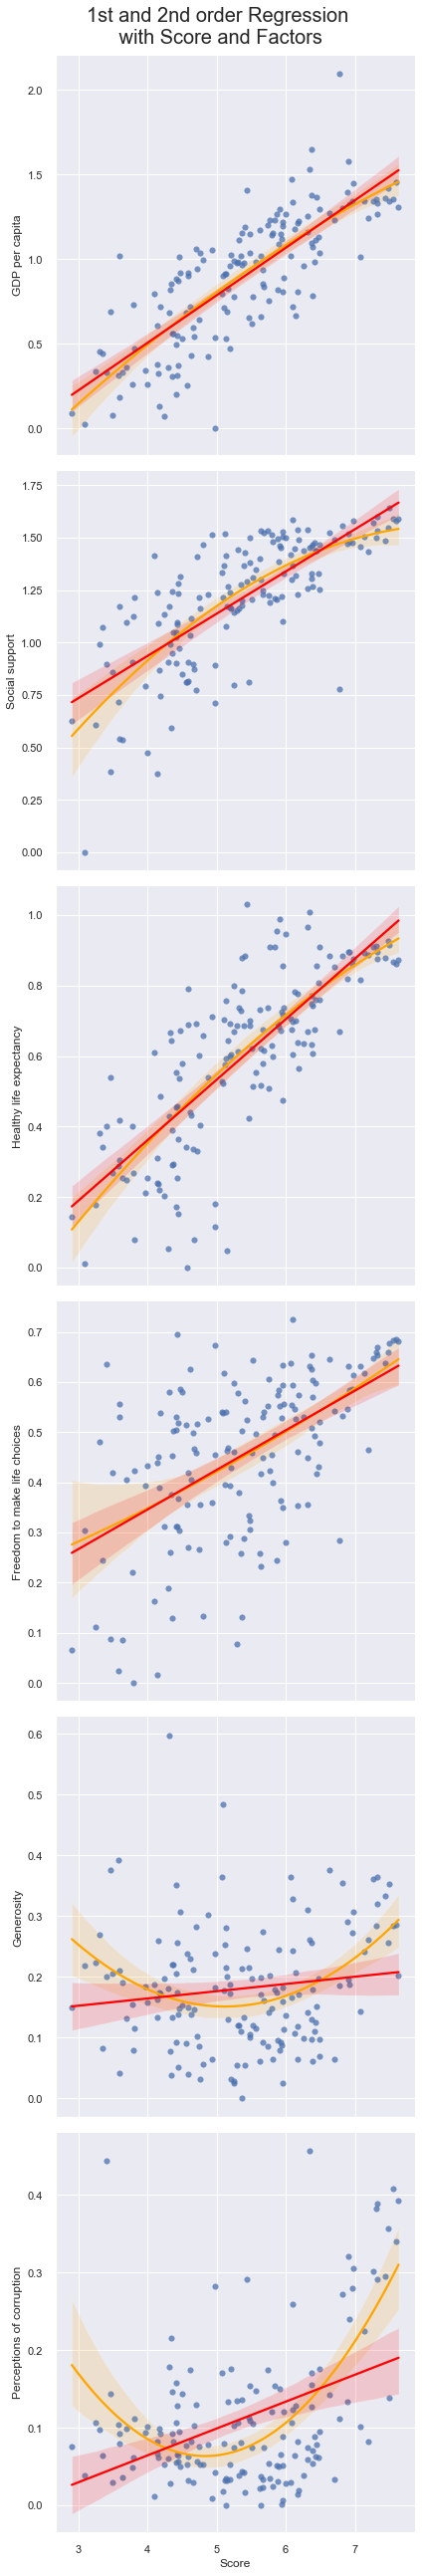

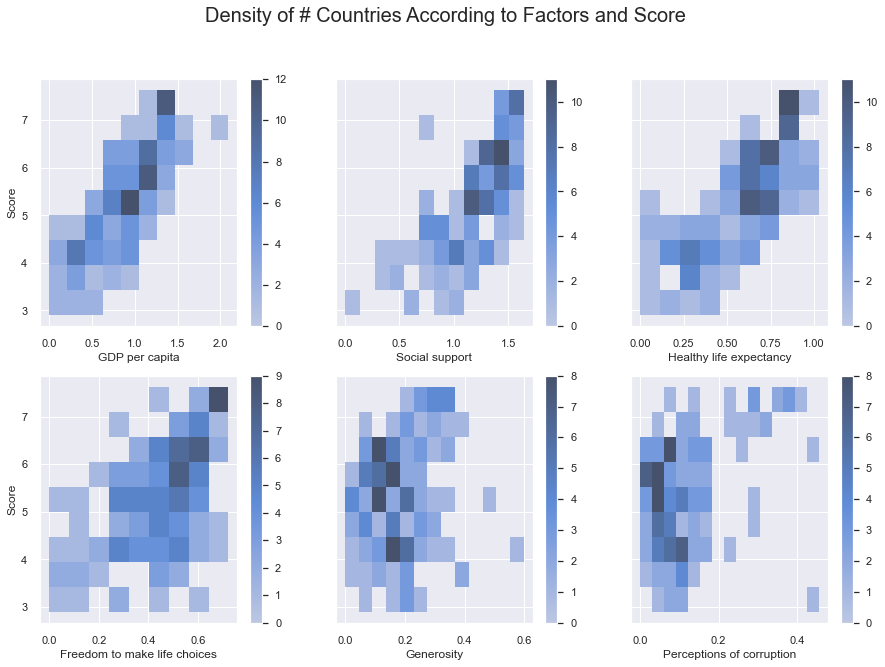

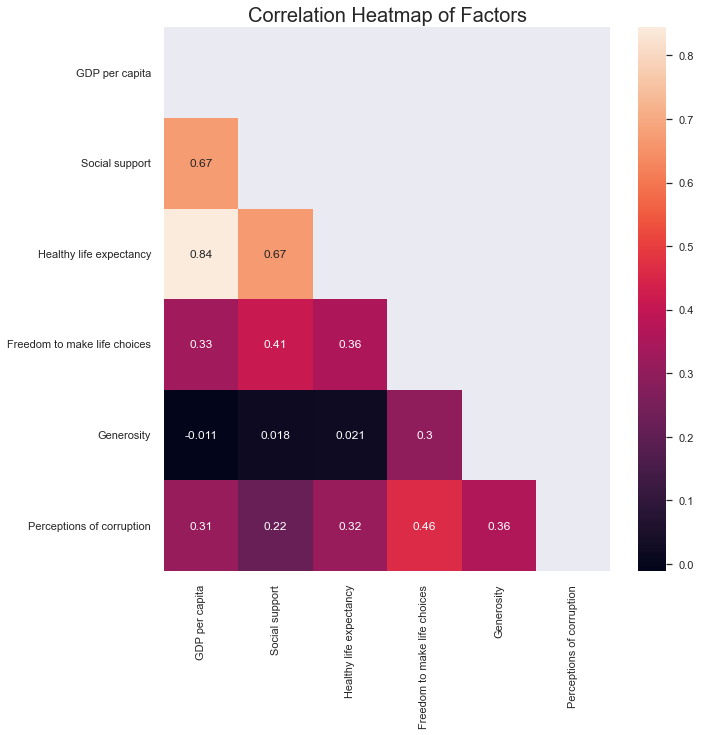

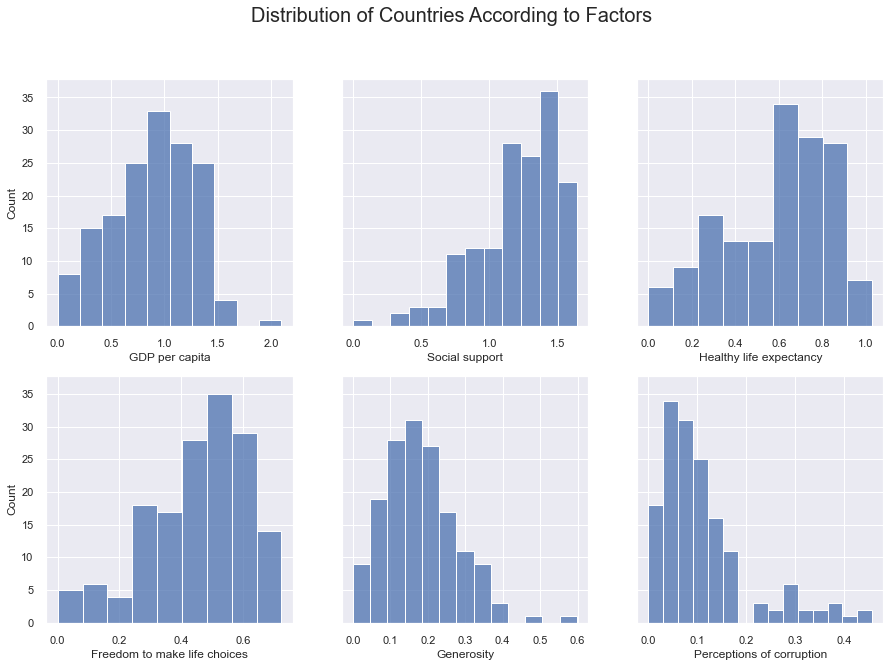

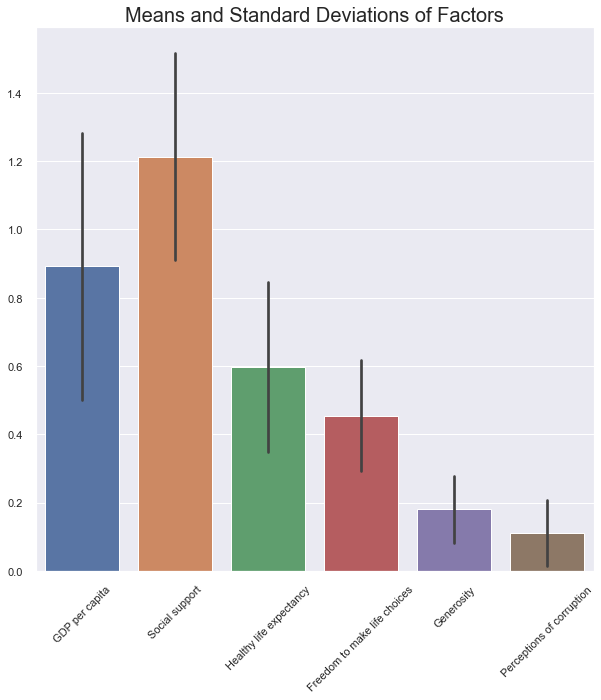

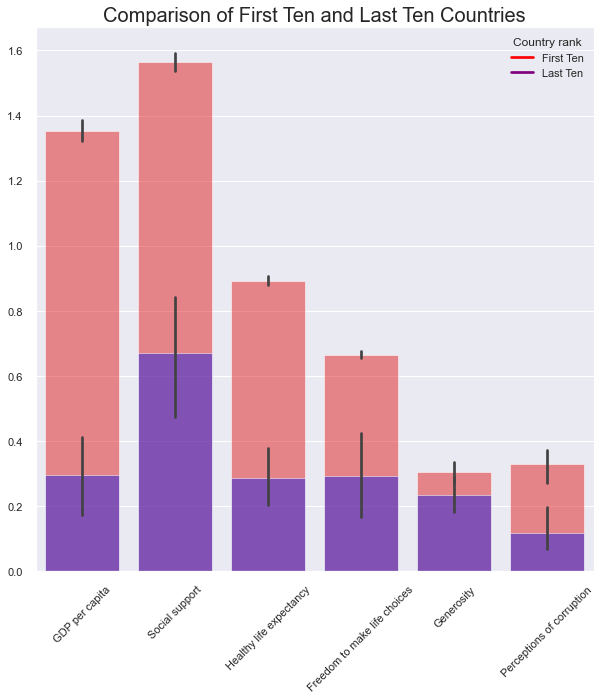

Overall rank                          1
Country or region               Finland
Score                             7.632
GDP per capita                    1.305
Social support                    1.592
Healthy life expectancy           0.874
Freedom to make life choices      0.681
Generosity                        0.202
Perceptions of corruption         0.393
Name: 0, dtype: object 
 Overall rank                        156
Country or region               Burundi
Score                             2.905
GDP per capita                    0.091
Social support                    0.627
Healthy life expectancy           0.145
Freedom to make life choices      0.065
Generosity                        0.149
Perceptions of corruption         0.076
Name: 155, dtype: object


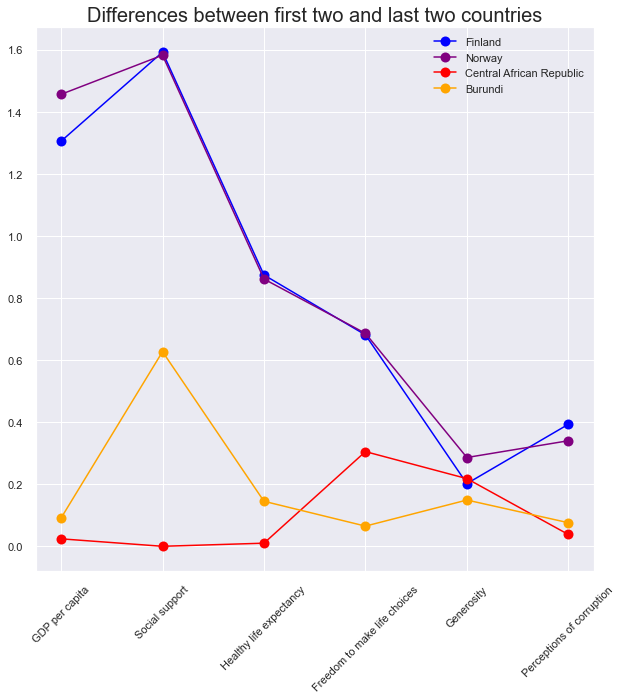

GDP per capita                  0.802
Healthy life expectancy         0.776
Social support                  0.746
Freedom to make life choices    0.544
Perceptions of corruption       0.403
Generosity                      0.136
Name: Score, dtype: float64


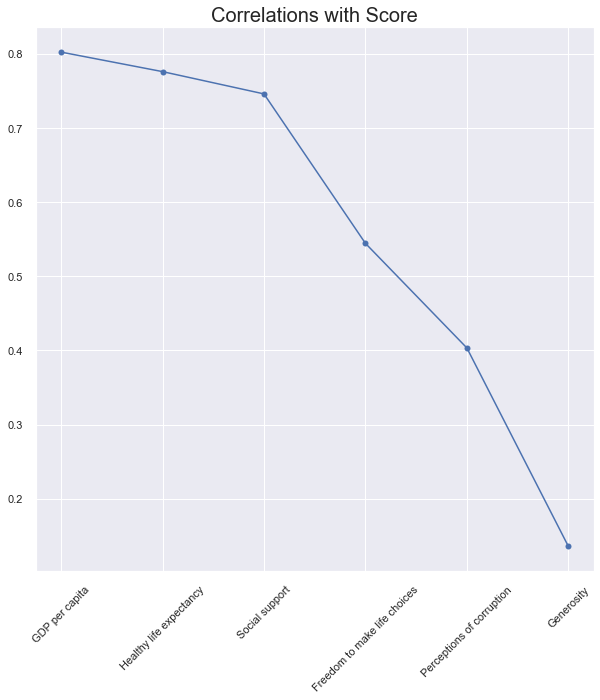

In [194]:
create_graphs(db_2018,"Overall rank","Score", "Country or region", 3)

In [195]:
db_2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [196]:
db_2017.tail()

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual  
150                       0.455220           0.540061  
151                       0.151347           1.061574  
152                       0.066035           0.621130  
153                       0.084148           1.683024  
154                       0.056565           2.066005

In [197]:
db_2017.describe()

Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  155.000000  155.000000                     155.000000   
mean     0.408786    0.246883                       0.123120   
std      0.149997    0.134780                       0.101661   
min      0.000000    0.000000                       0.000000   
25%      0.303677    0.154106                       0.057271   
50%      0.437454    0.231538                       0.089848   
75%      0.516561    0.323762                       0.153296   
max      0.658249    0.838075                       0.464308   

       Dystopia.Residual  
count         155.000000  
mean            1.850238  
std             0.500028  
min             0.377914  
25%             1.591291  
50%             1.832910  
75%             2.144654  
max             3.117485

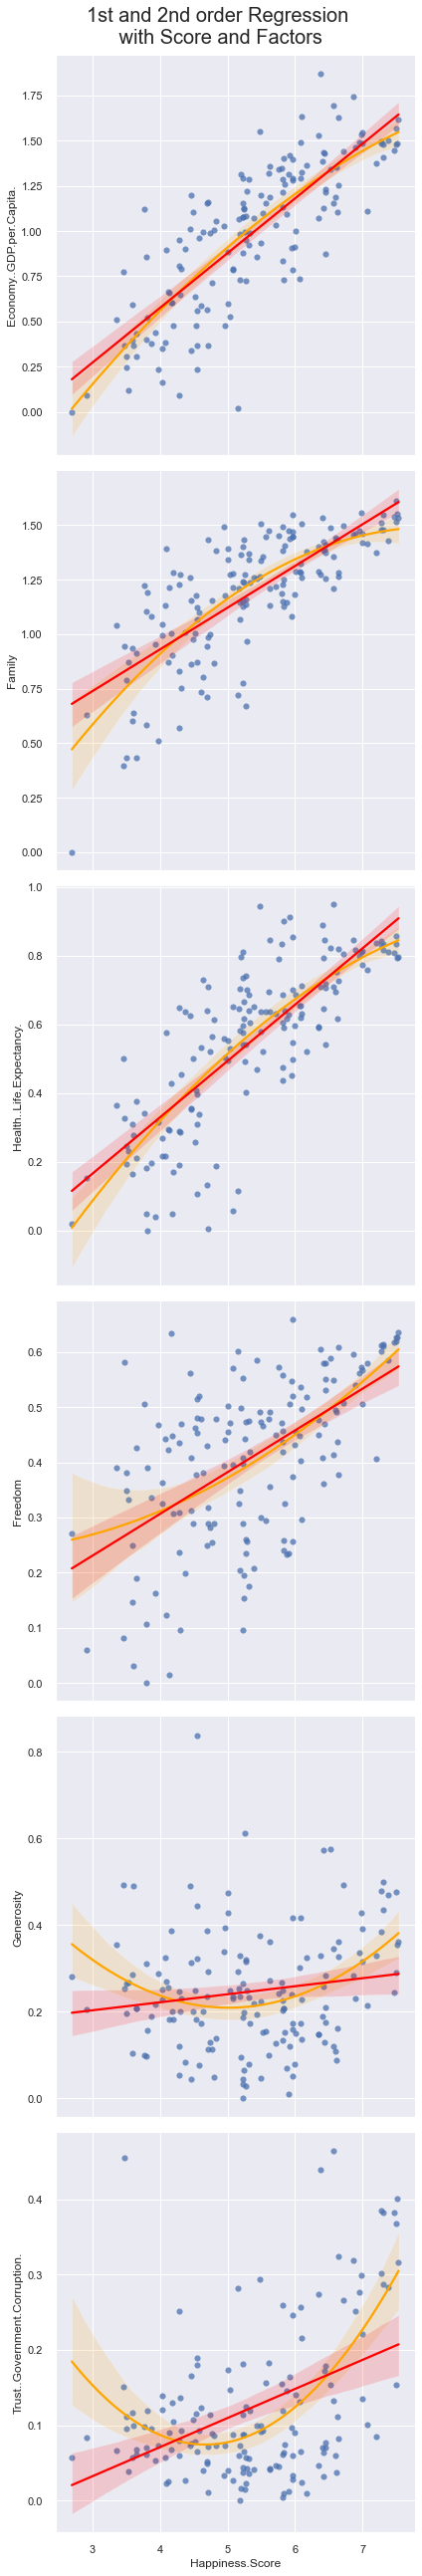

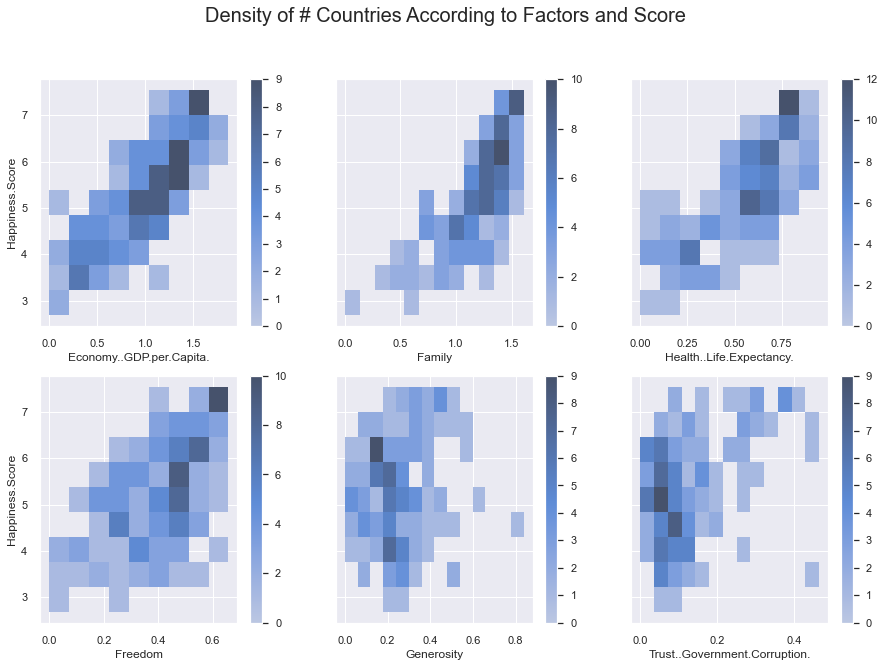

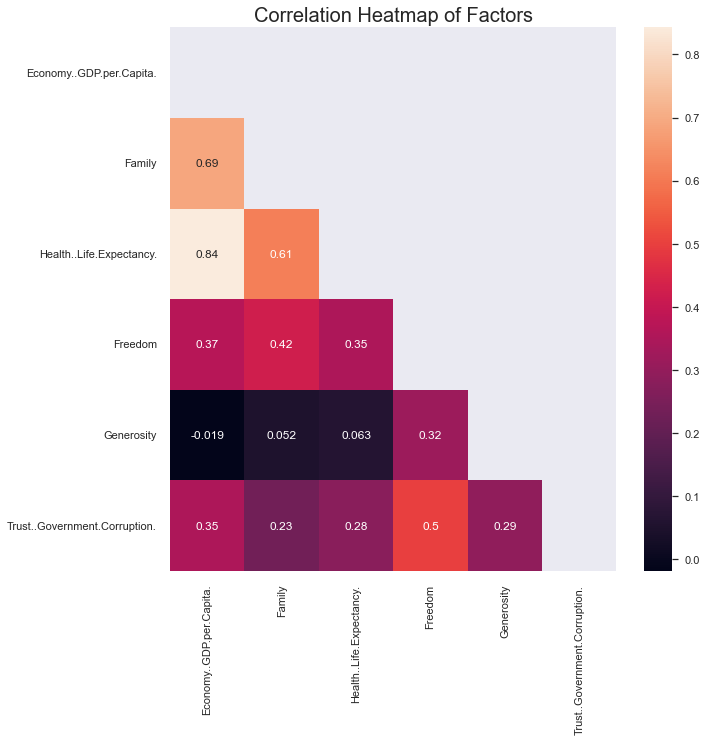

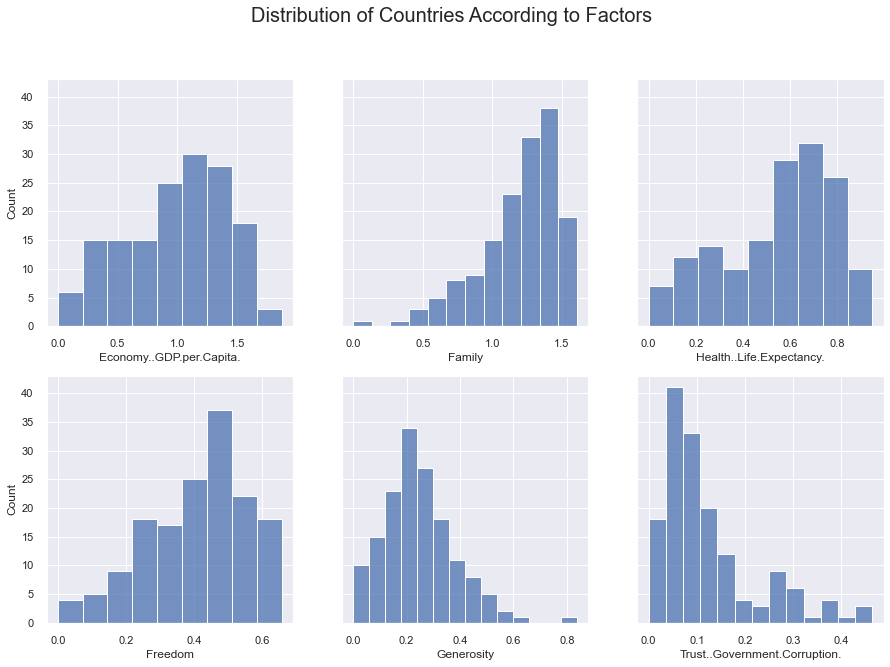

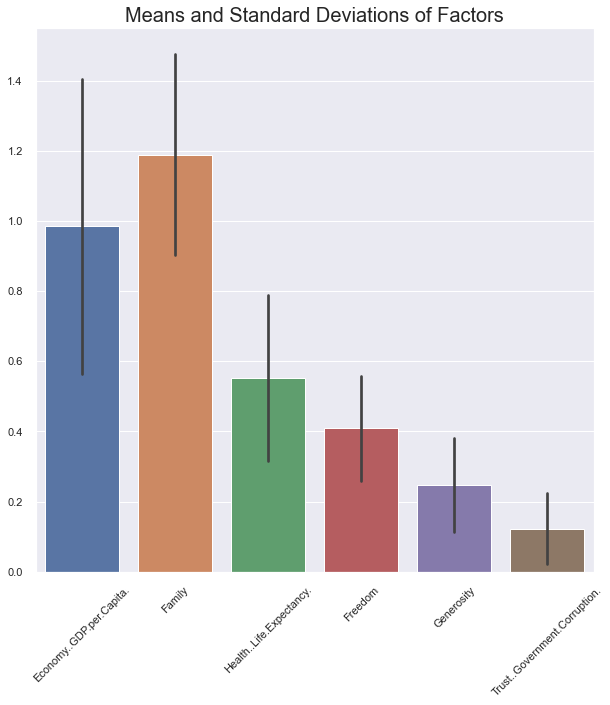

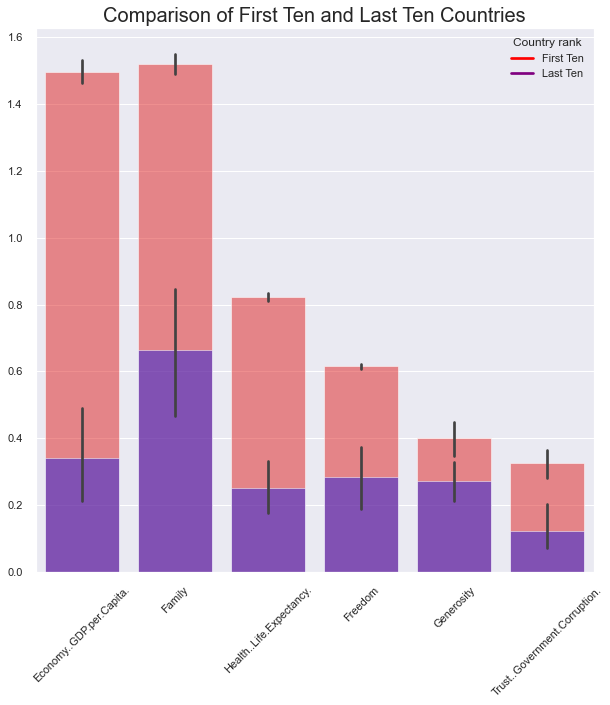

Country                            Norway
Happiness.Rank                          1
Happiness.Score                     7.537
Economy..GDP.per.Capita.         1.616463
Family                           1.533524
Health..Life.Expectancy.         0.796667
Freedom                          0.635423
Generosity                       0.362012
Trust..Government.Corruption.    0.315964
Name: 0, dtype: object 
 Country                          Central African Republic
Happiness.Rank                                        155
Happiness.Score                                     2.693
Economy..GDP.per.Capita.                              0.0
Family                                                0.0
Health..Life.Expectancy.                         0.018773
Freedom                                          0.270842
Generosity                                       0.280876
Trust..Government.Corruption.                    0.056565
Name: 154, dtype: object


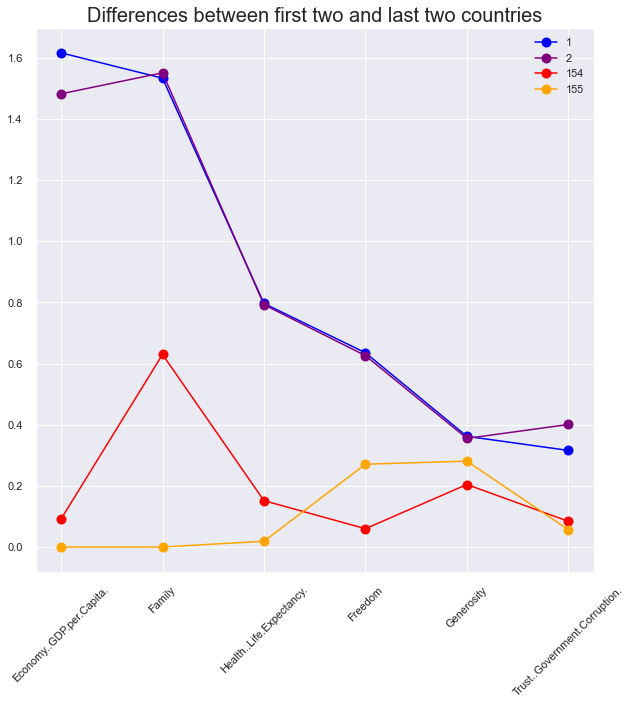

Economy..GDP.per.Capita.         0.812
Health..Life.Expectancy.         0.782
Family                           0.753
Freedom                          0.570
Trust..Government.Corruption.    0.429
Generosity                       0.155
Name: Happiness.Score, dtype: float64


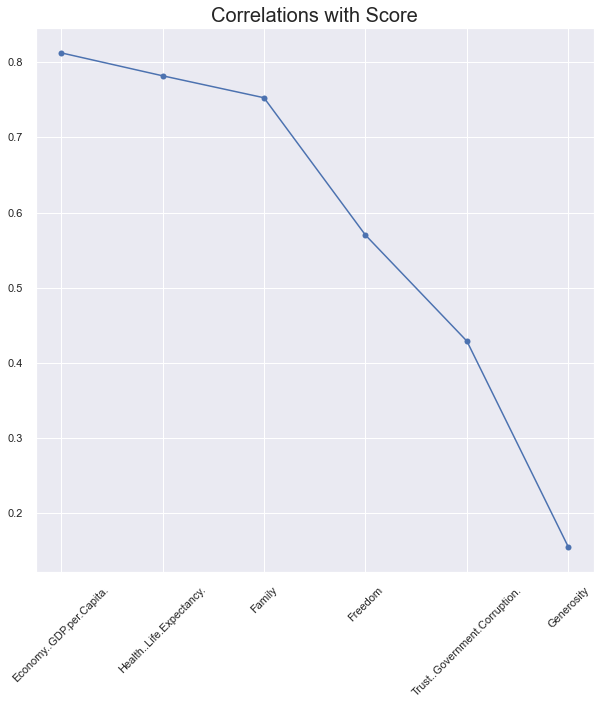

In [198]:
create_graphs(db_2017.drop(["Whisker.high","Whisker.low",'Dystopia.Residual'],axis=1),"Happiness.Rank","Happiness.Score","Country",3)

In [199]:
db_2016.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [200]:
db_2016.tail()

Country                           Region  Happiness Rank  \
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
152            3.484                      3.404                      3.564   
153            3.360                      3.288                      3.432   
154            3.303                      3.192                      3.414   
155            3.069                      2.936                      3.202   
156            2.905                      2.732                      3.078   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
152                   0.39499  0.10419                   0.21028  0.39747   
153                   0.38227  0.11037                   0.17344  0.16430   
154                   0.28123  0.00000                   0.24811  0.34678   
155                   0.74719  0.14866                   0.62994  0.06912   
156                   0.06831  0.23442                   0.15747  0.04320   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
152                        0.06681     0.20180            2.10812  
153                        0.07112     0.31268            2.14558  
154                        0.11587     0.17517            2.13540  
155                        0.17233     0.48397            0.81789  
156                        0.09419     0.20290            2.10404

In [201]:
db_2016.describe()

Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000                  0.000000    0.000000   
25%                     4.465000                  0.670240    0.641840   
50%                     5.419000                  1.027800    0.841420   
75%                     6.434000                  1.279640    1.021520   
max                     7.669000                  1.824270    1.183260   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                157.000000  157.000000                     157.000000   
mean                   0.557619    0.370994                       0.137624   
std                    0.229349    0.145507                       0.111038   
min                    0.000000    0.000000                       0.000000   
25%                    0.382910    0.257480                       0.061260   
50%                    0.596590    0.397470                       0.105470   
75%                    0.729930    0.484530                       0.175540   
max                    0.952770    0.608480                       0.505210   

       Generosity  Dystopia Residual  
count  157.000000         157.000000  
mean     0.242635           2.325807  
std      0.133756           0.542220  
min      0.000000           0.817890  
25%      0.154570           2.031710  
50%      0.222450           2.290740  
75%      0.311850           2.664650  
max      0.819710           3.837720

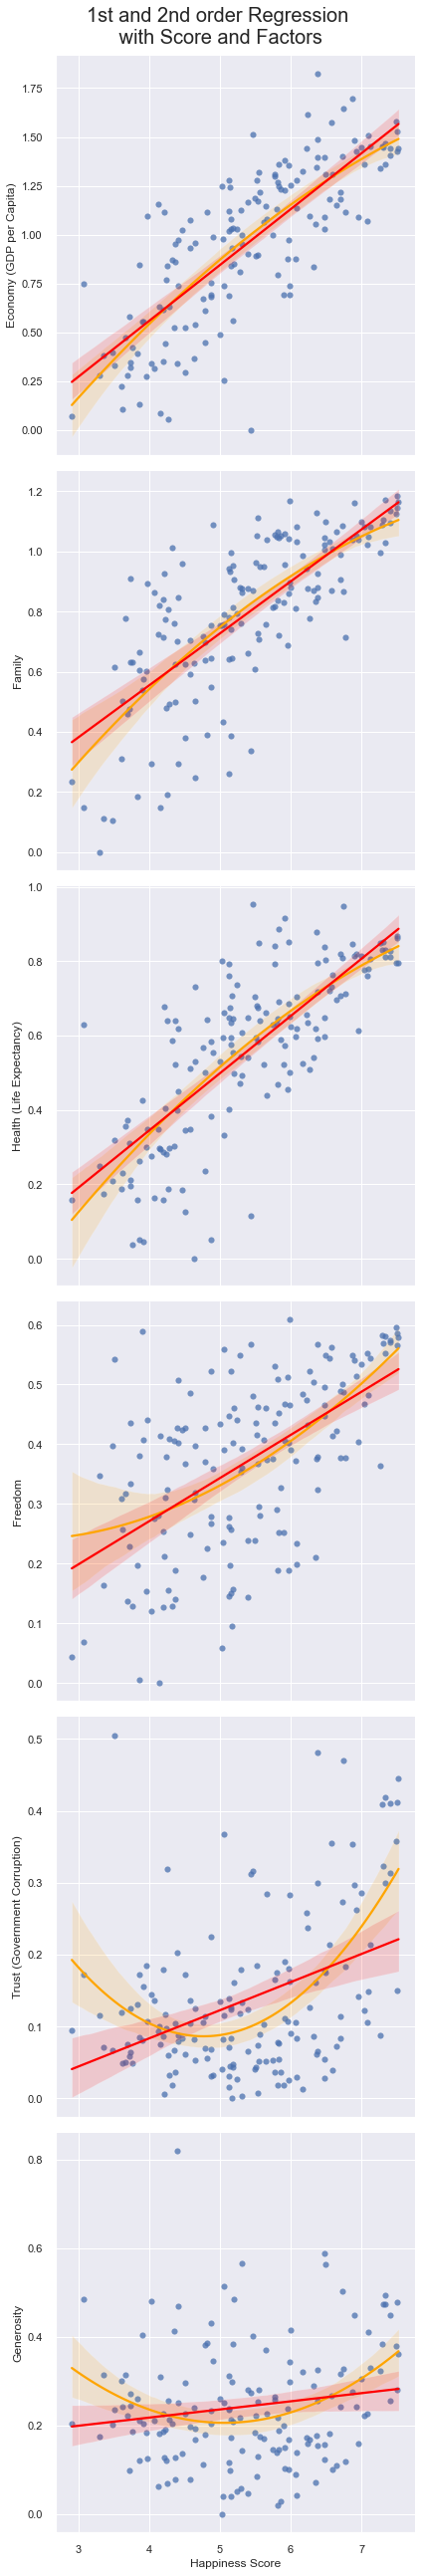

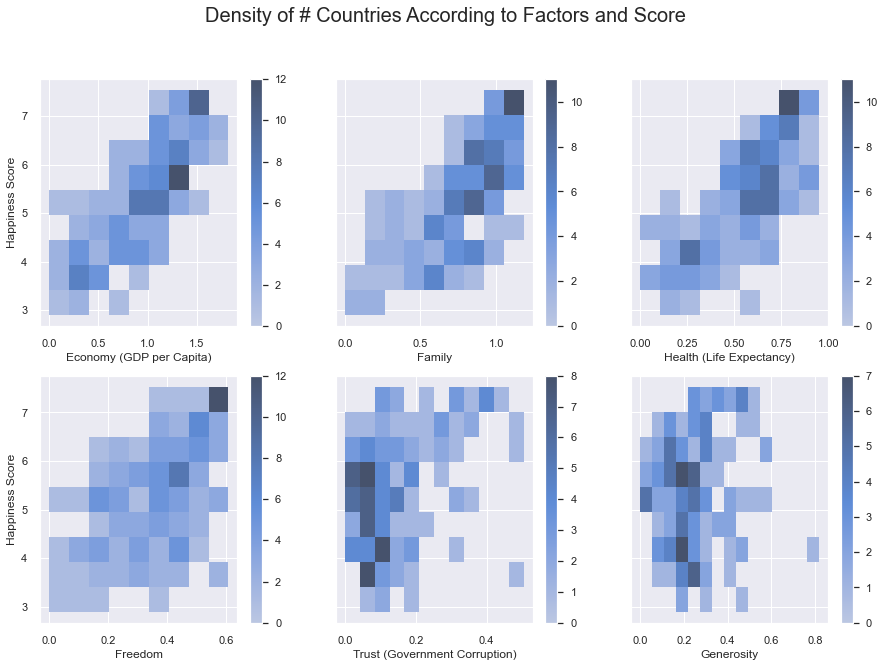

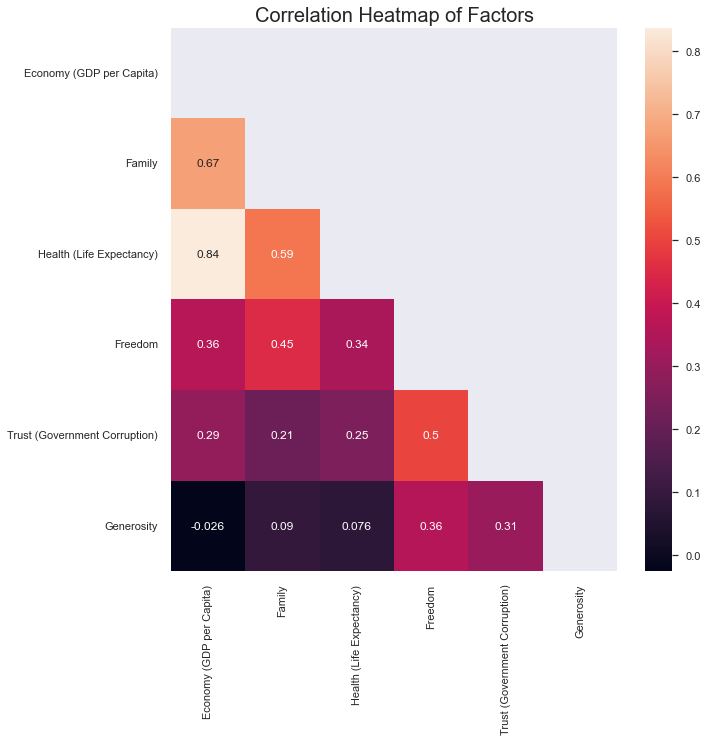

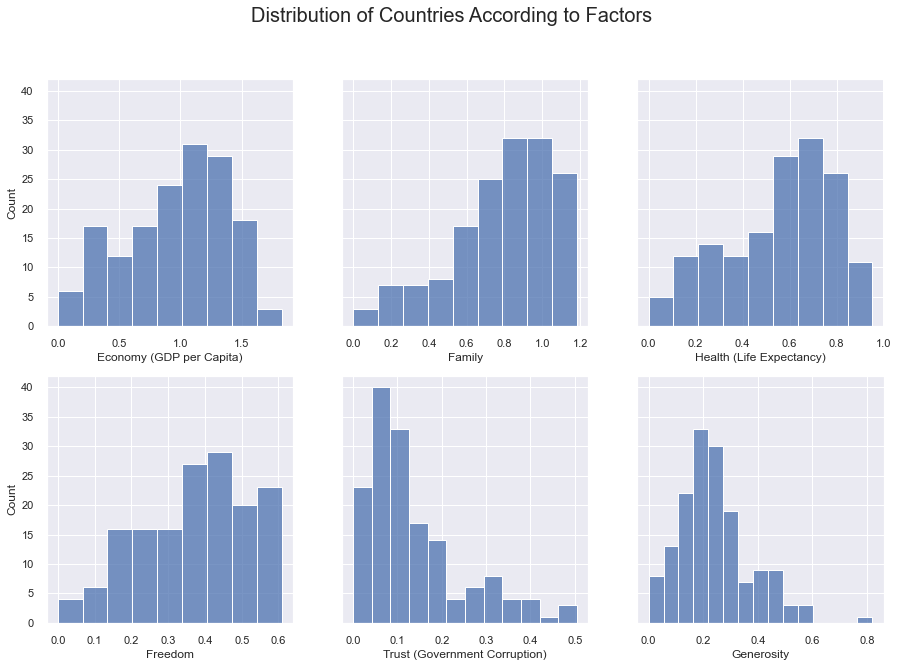

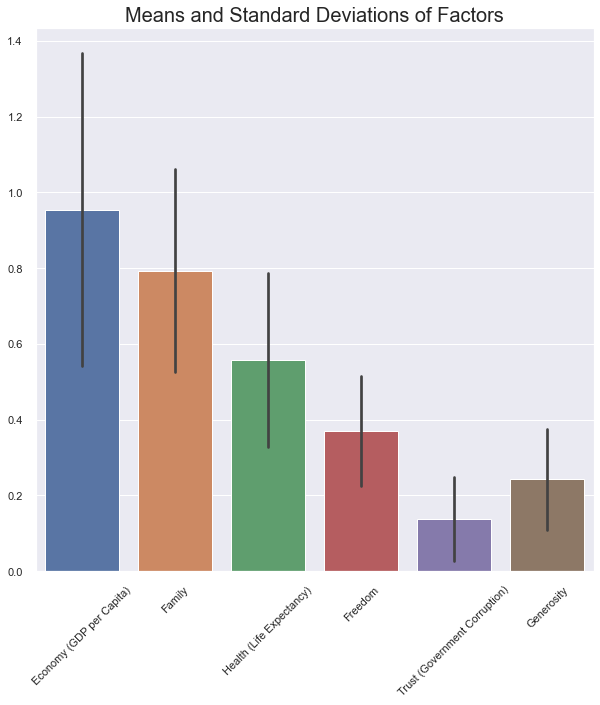

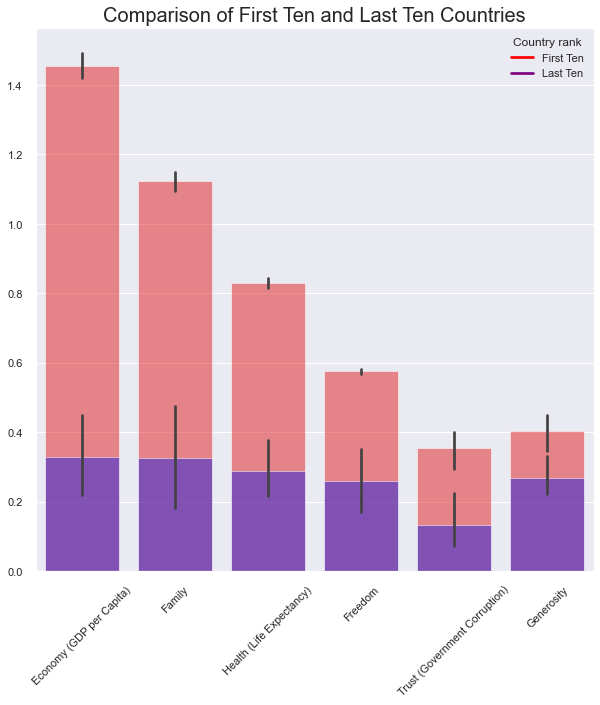

Country                          Denmark
Happiness Rank                         1
Happiness Score                    7.526
Economy (GDP per Capita)         1.44178
Family                           1.16374
Health (Life Expectancy)         0.79504
Freedom                          0.57941
Trust (Government Corruption)    0.44453
Generosity                       0.36171
Name: 0, dtype: object 
 Country                          Burundi
Happiness Rank                       157
Happiness Score                    2.905
Economy (GDP per Capita)         0.06831
Family                           0.23442
Health (Life Expectancy)         0.15747
Freedom                           0.0432
Trust (Government Corruption)    0.09419
Generosity                        0.2029
Name: 156, dtype: object


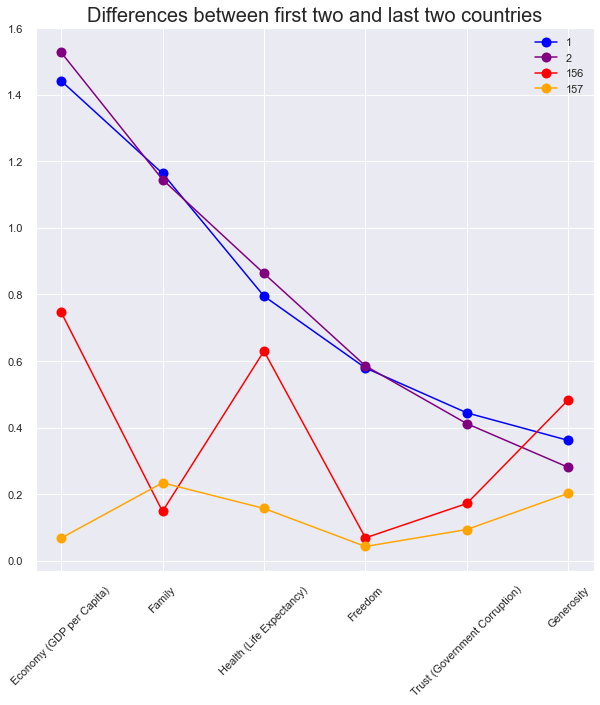

Economy (GDP per Capita)         0.790
Health (Life Expectancy)         0.765
Family                           0.739
Freedom                          0.567
Trust (Government Corruption)    0.402
Generosity                       0.157
Name: Happiness Score, dtype: float64


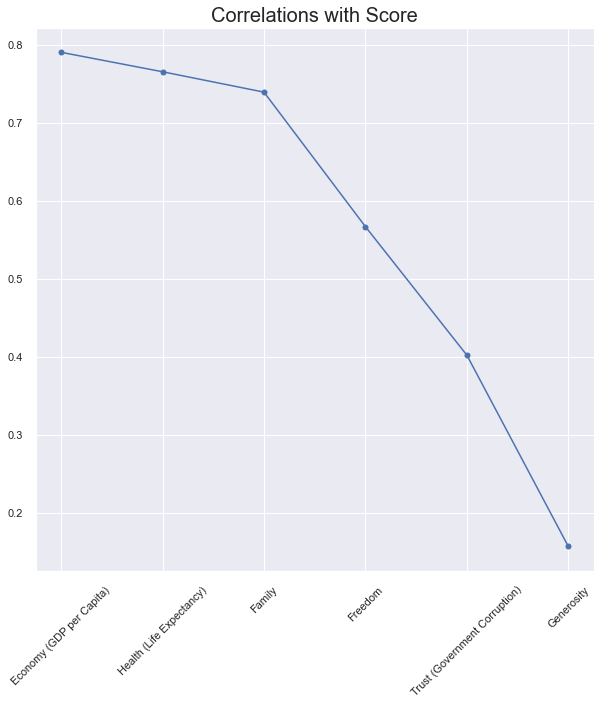

In [202]:
create_graphs(db_2016.drop(["Region","Upper Confidence Interval", "Lower Confidence Interval",'Dystopia Residual'],axis=1),"Happiness Rank","Happiness Score","Country",3)

In [203]:
db_2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [204]:
db_2015.tail()

Country                           Region  Happiness Rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726

In [205]:
db_2015.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

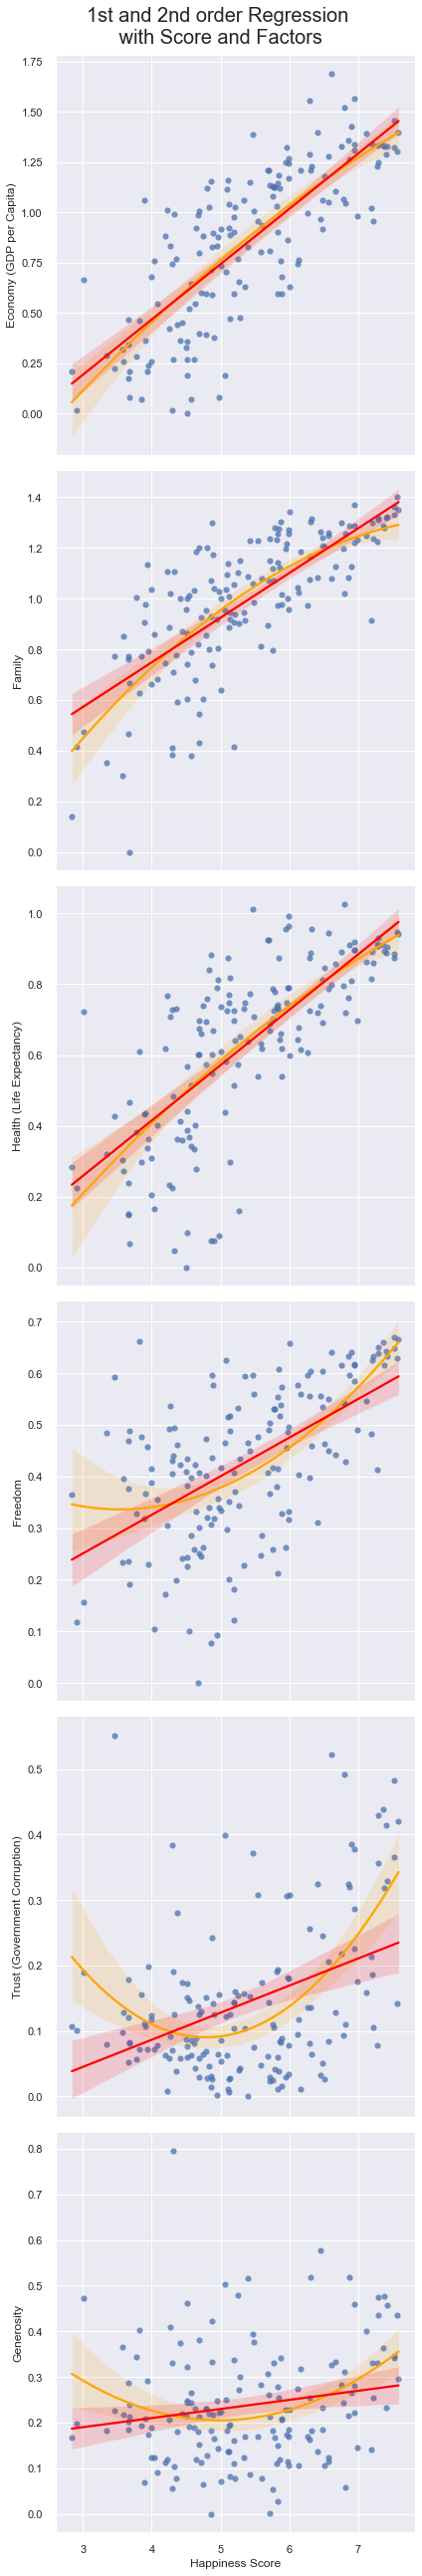

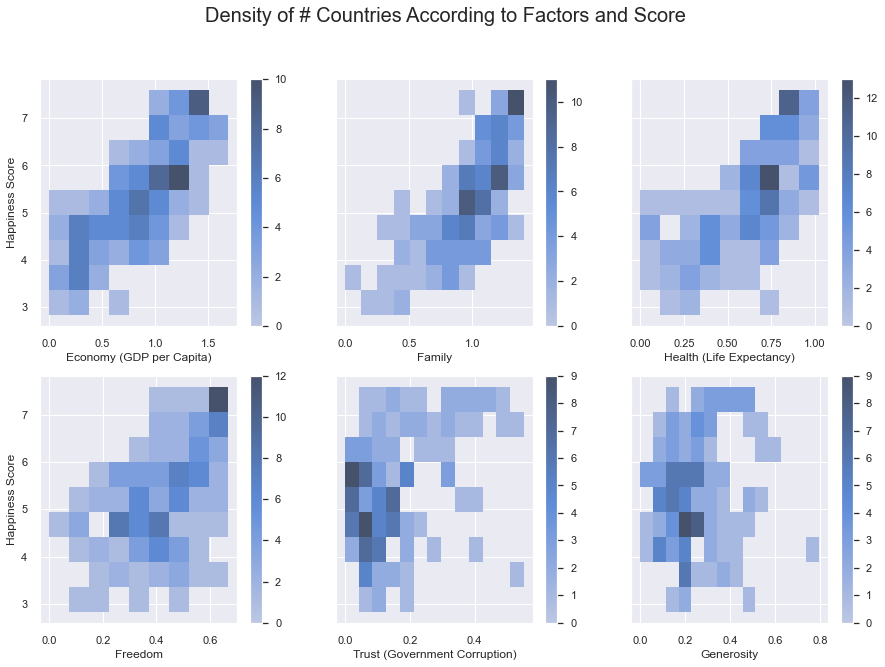

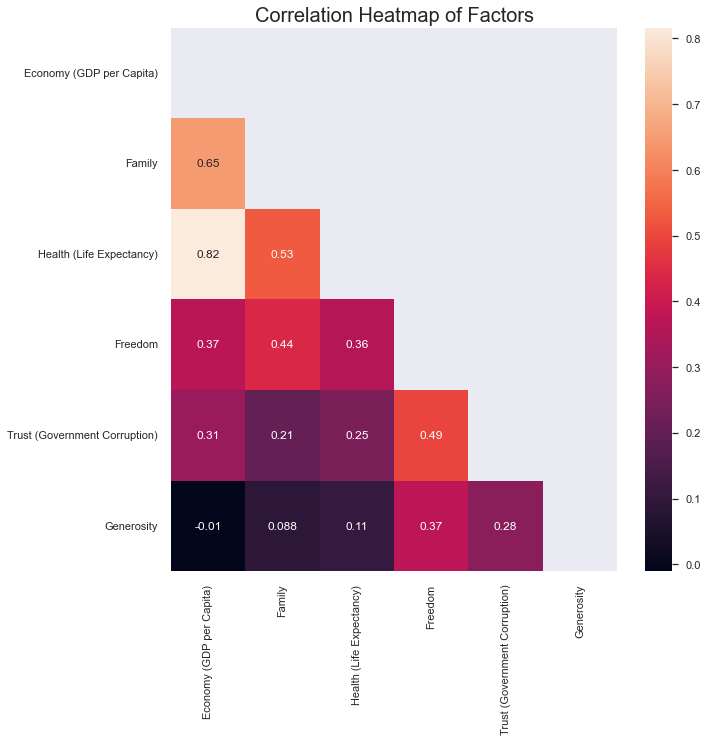

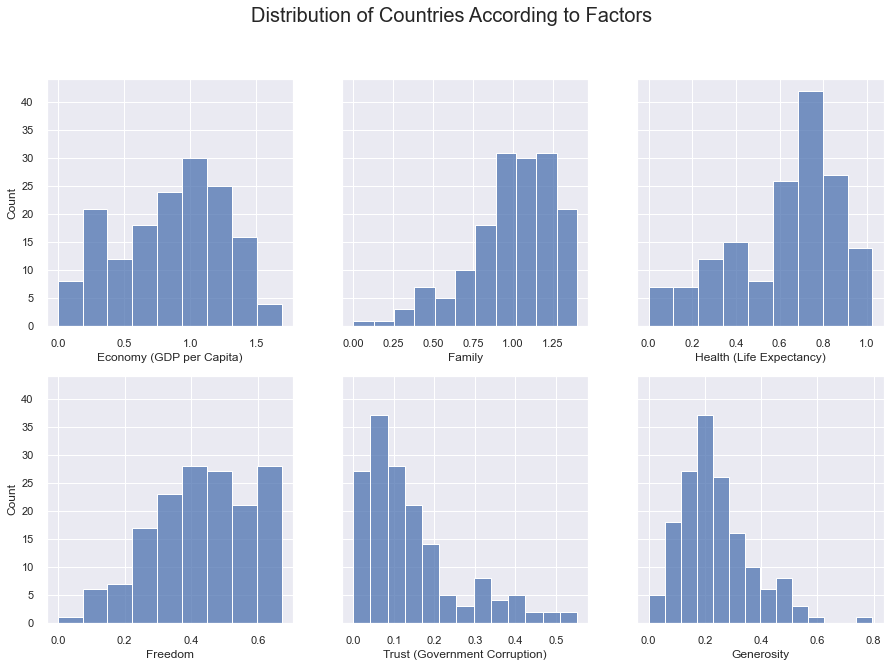

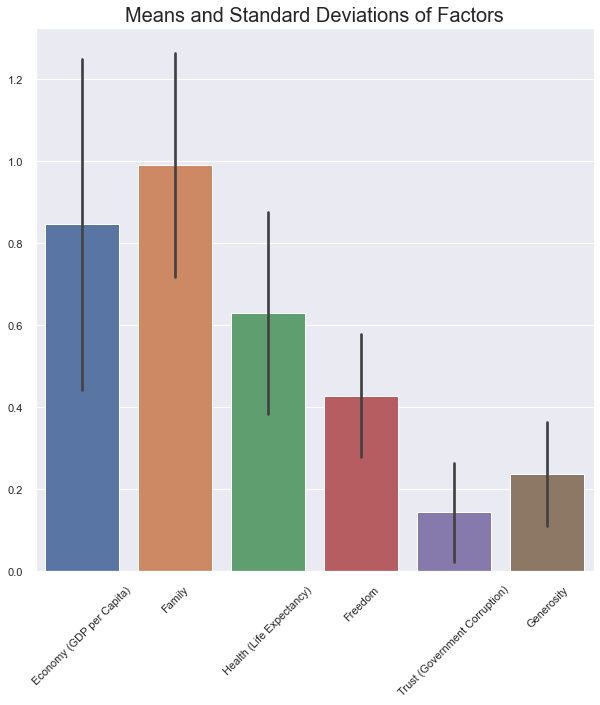

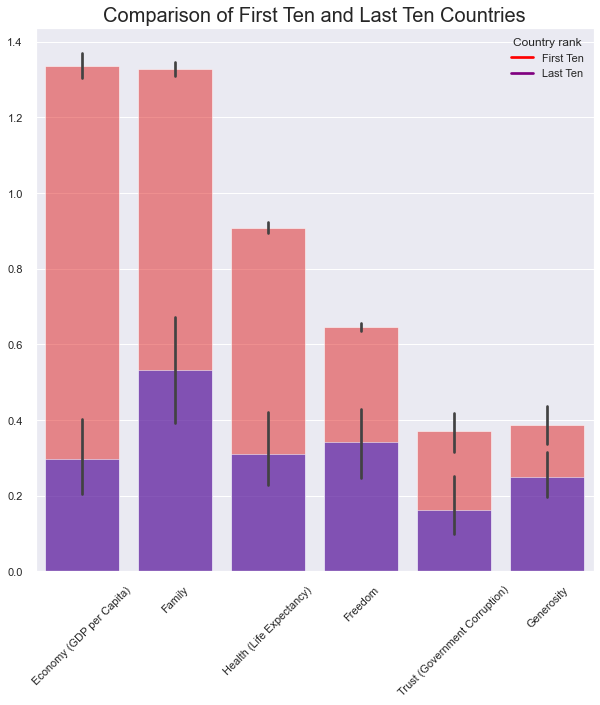

Country                          Switzerland
Happiness Rank                             1
Happiness Score                        7.587
Economy (GDP per Capita)             1.39651
Family                               1.34951
Health (Life Expectancy)             0.94143
Freedom                              0.66557
Trust (Government Corruption)        0.41978
Generosity                           0.29678
Name: 0, dtype: object 
 Country                             Togo
Happiness Rank                       158
Happiness Score                    2.839
Economy (GDP per Capita)         0.20868
Family                           0.13995
Health (Life Expectancy)         0.28443
Freedom                          0.36453
Trust (Government Corruption)    0.10731
Generosity                       0.16681
Name: 157, dtype: object


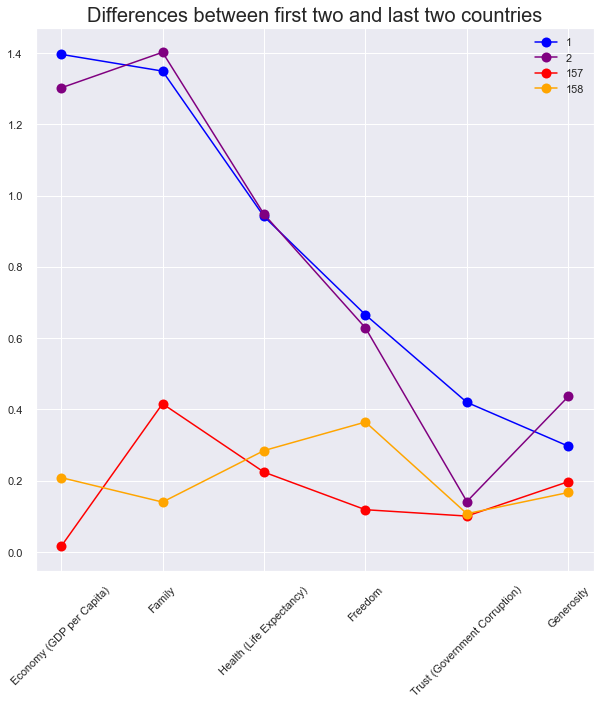

Economy (GDP per Capita)         0.781
Family                           0.741
Health (Life Expectancy)         0.724
Freedom                          0.568
Trust (Government Corruption)    0.395
Generosity                       0.180
Name: Happiness Score, dtype: float64


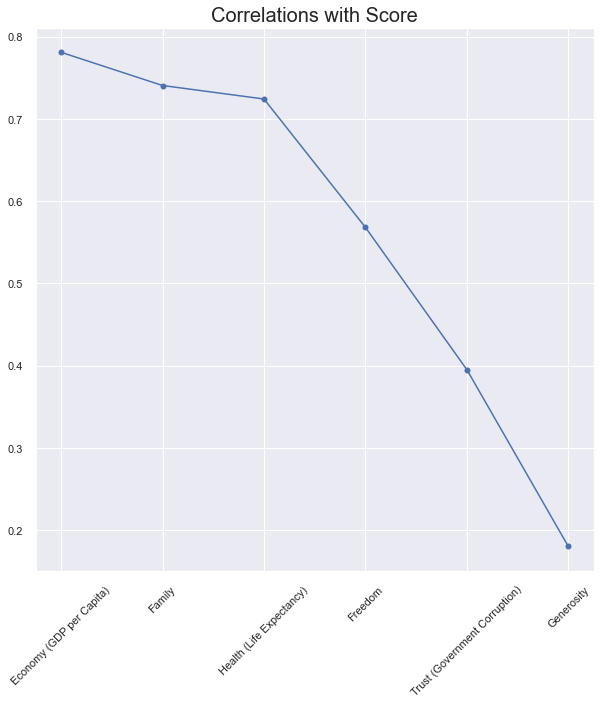

In [206]:
create_graphs(db_2015.drop(['Standard Error','Region','Dystopia Residual'],axis=1),"Happiness Rank","Happiness Score","Country",3)

Slope (as a measure of contribution): 0.286


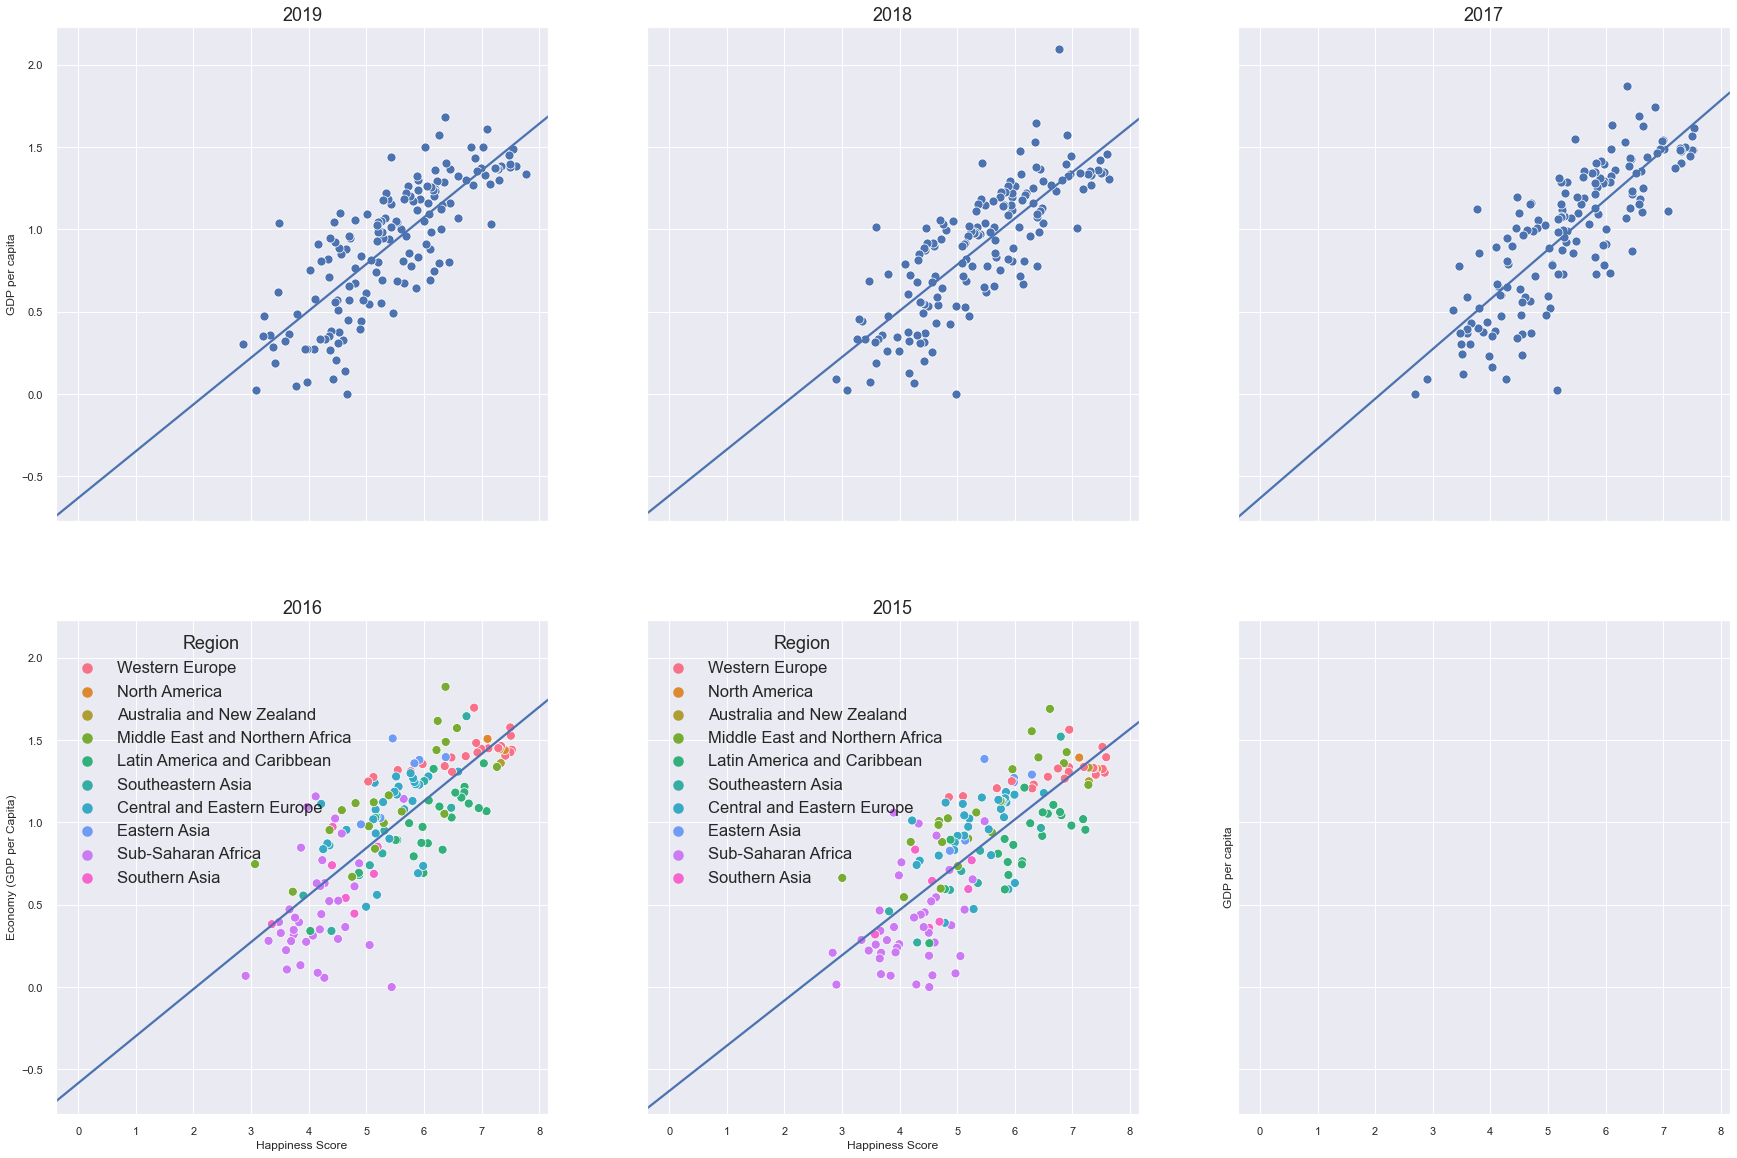

<Figure size 576x396 with 0 Axes>

In [208]:
graph_happ_cont('GDP per capita', ['GDP per capita', 'GDP per capita', 'Economy..GDP.per.Capita.', 'Economy (GDP per Capita)', 'Economy (GDP per Capita)'])

Slope (as a measure of contribution): 0.075


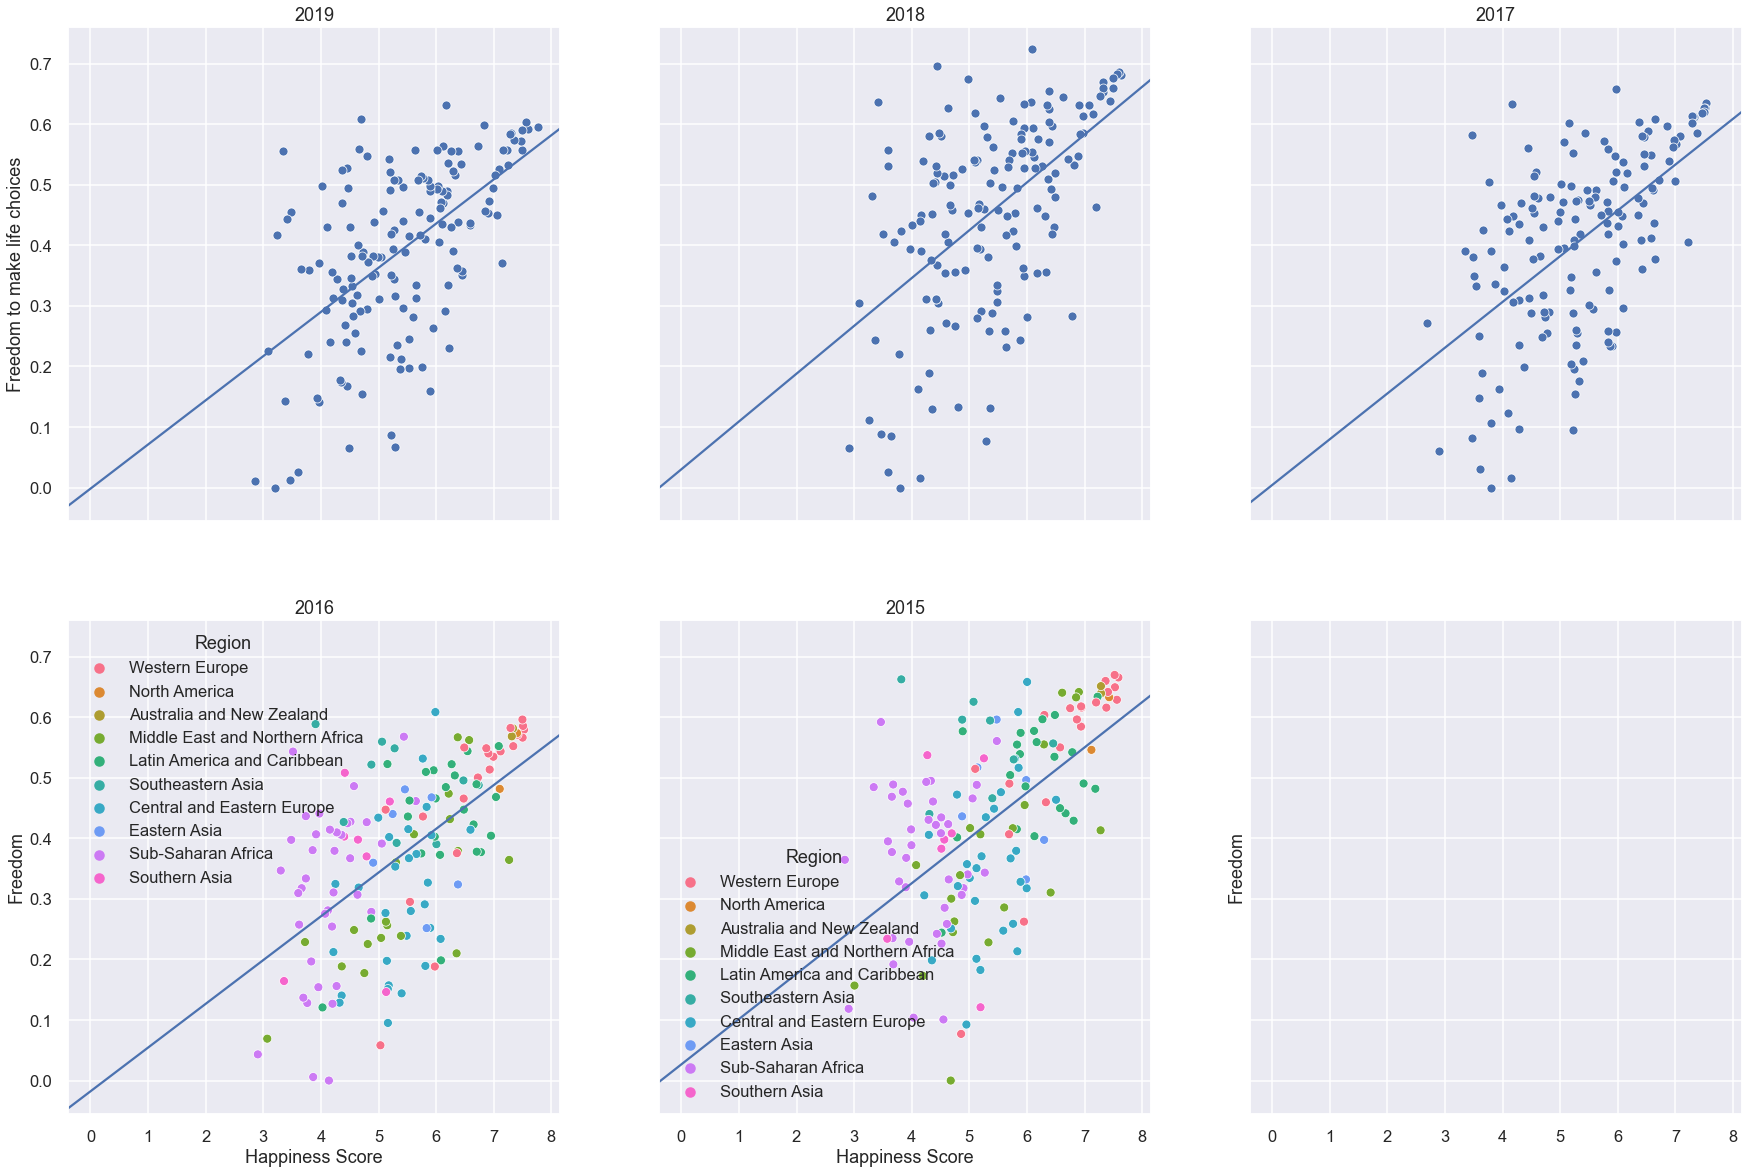

<Figure size 576x396 with 0 Axes>

In [209]:
graph_happ_cont('Freedom', ['Freedom to make life choices','Freedom to make life choices','Freedom','Freedom','Freedom'] )

Slope (as a measure of contribution): 0.163


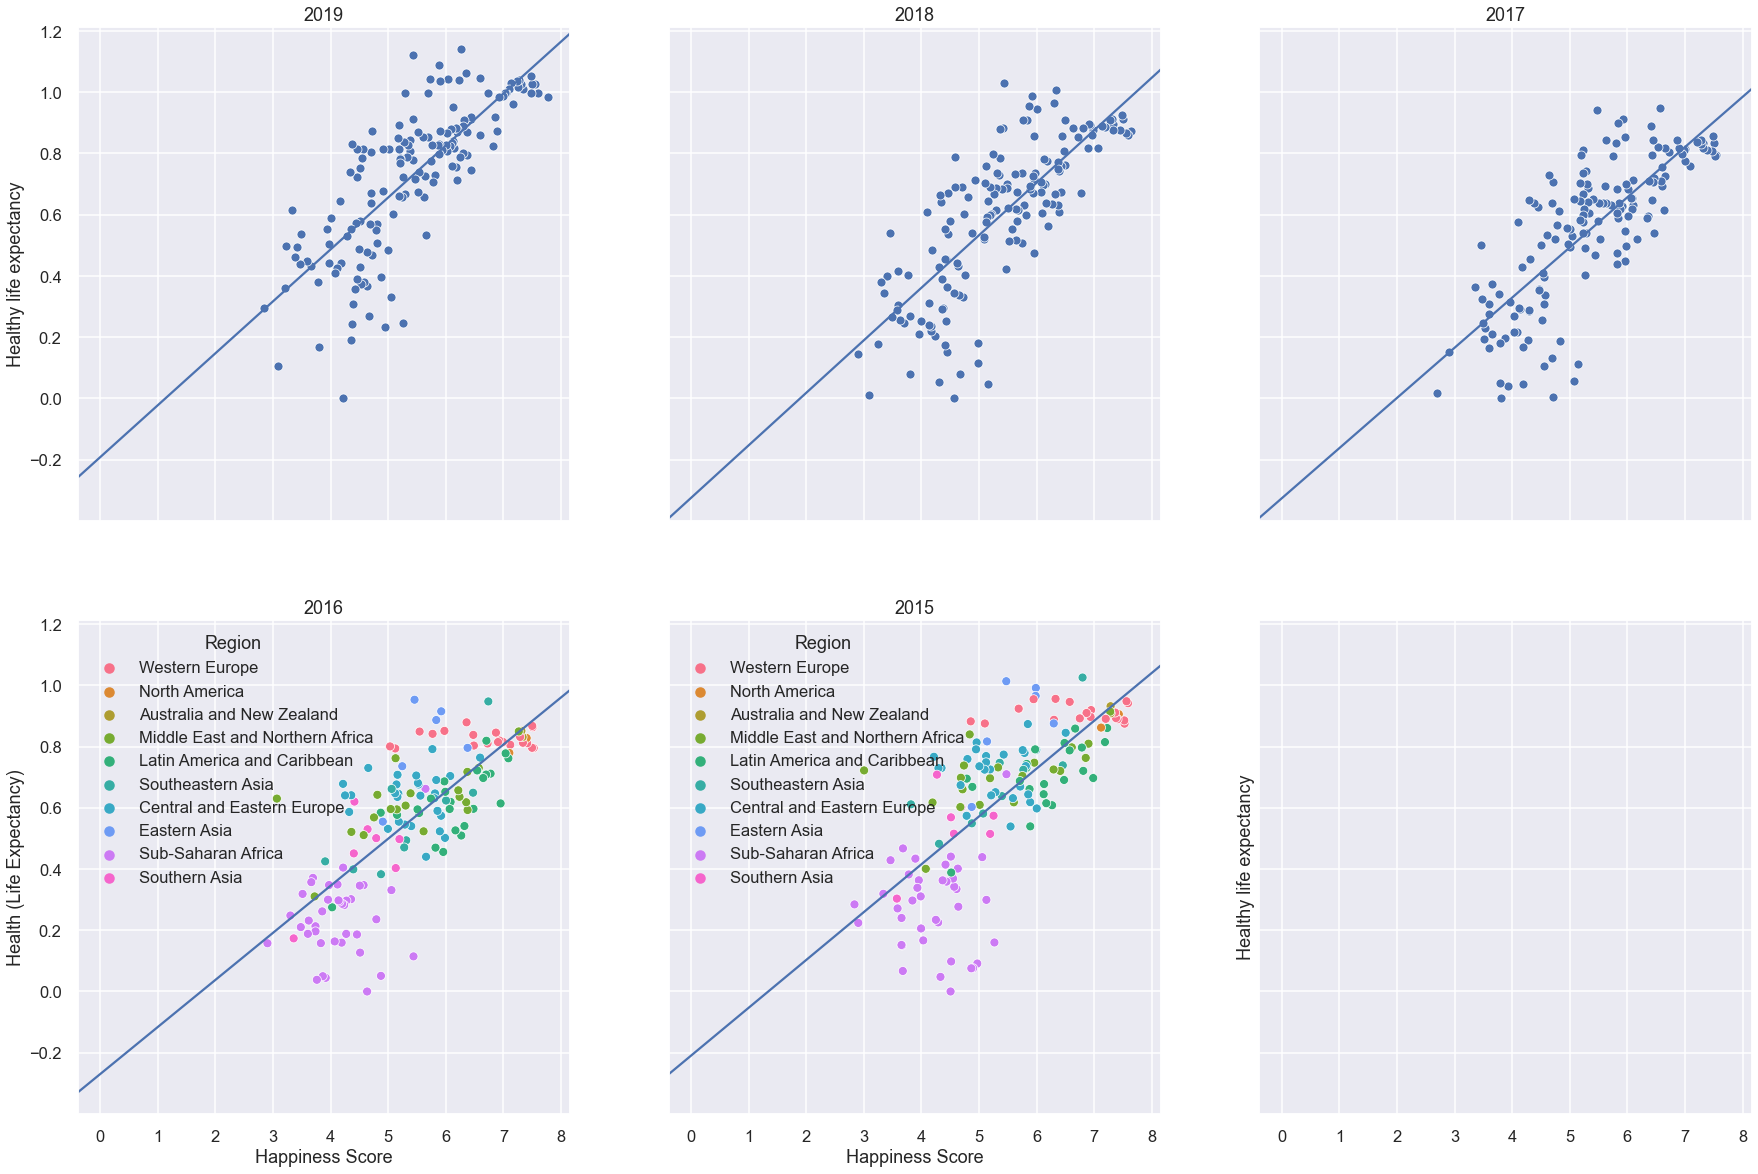

<Figure size 576x396 with 0 Axes>

In [210]:
graph_happ_cont('Healthy life expectancy', ['Healthy life expectancy', 'Healthy life expectancy', 'Health..Life.Expectancy.', 'Health (Life Expectancy)', 'Health (Life Expectancy)'])

Slope (as a measure of contribution): 0.19


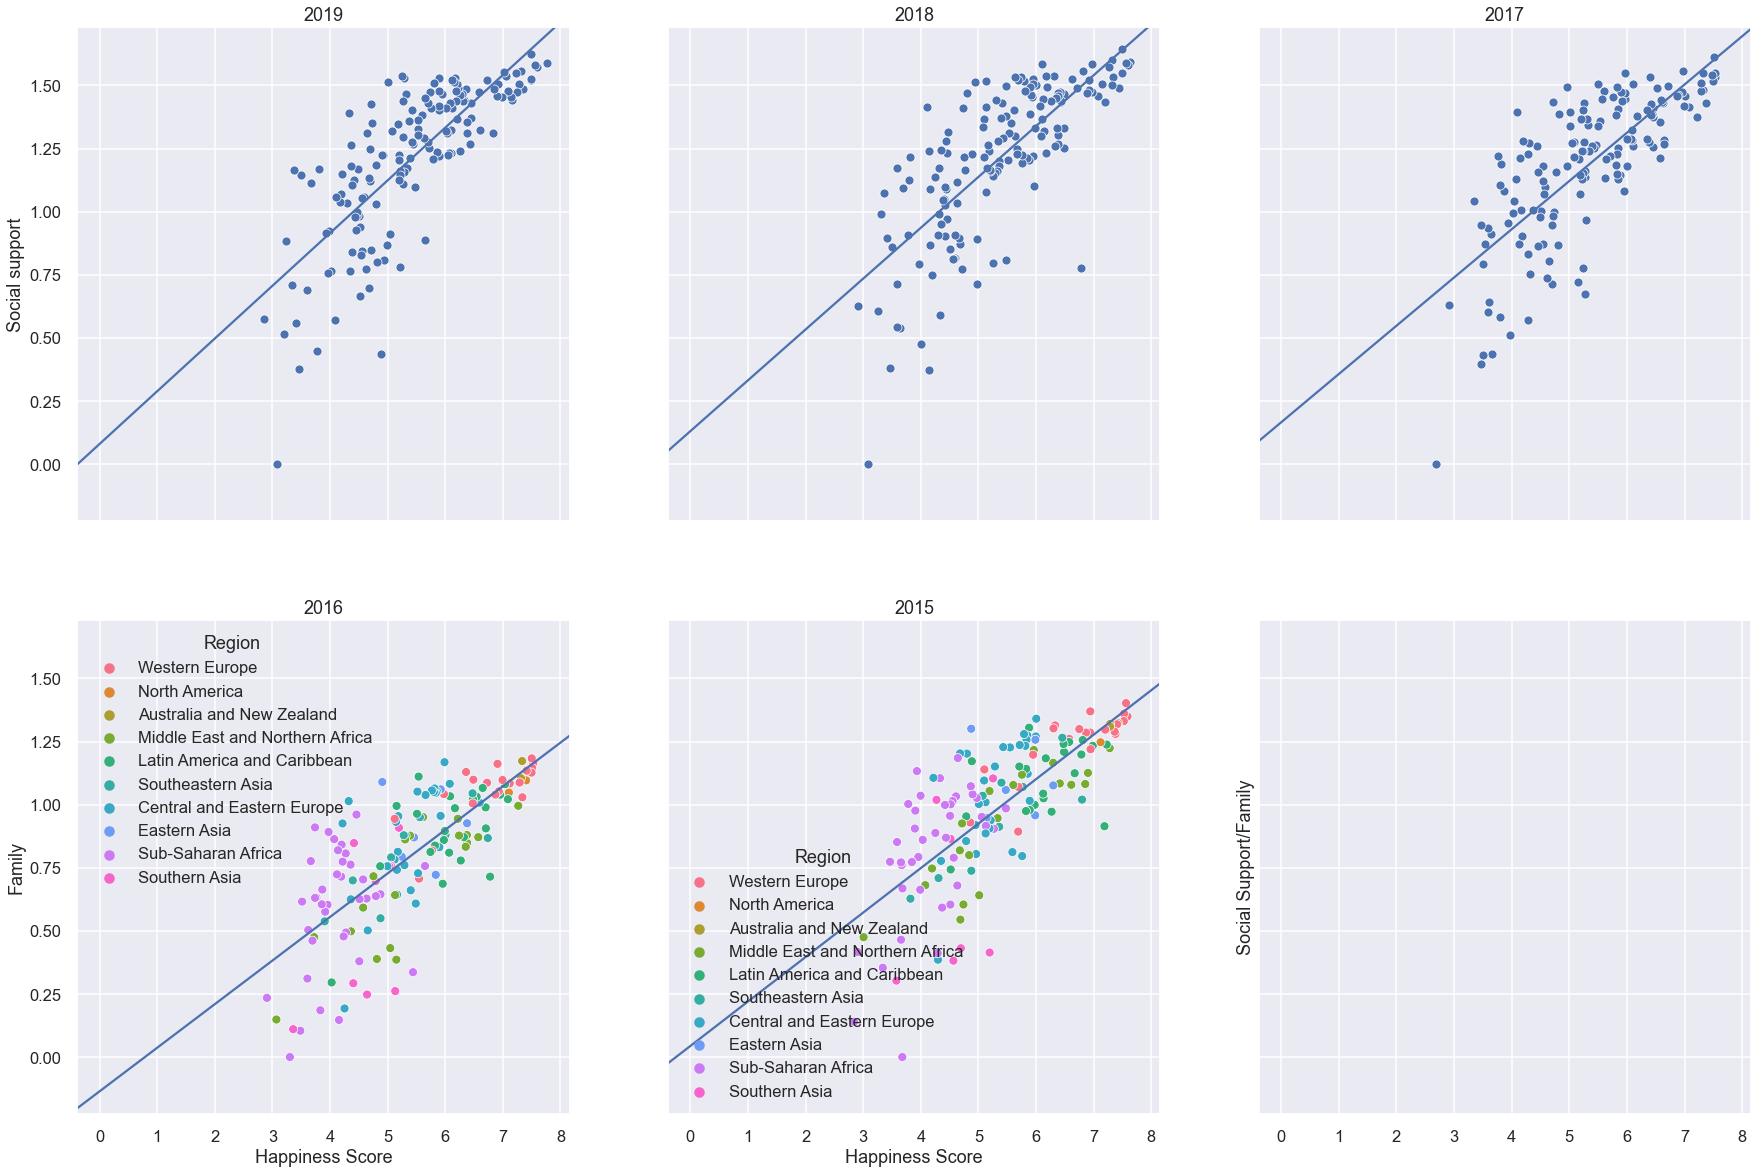

<Figure size 576x396 with 0 Axes>

In [211]:
graph_happ_cont('Social Support/Family',['Social support', 'Social support', 'Family', 'Family', 'Family'])

Slope (as a measure of contribution): 0.037


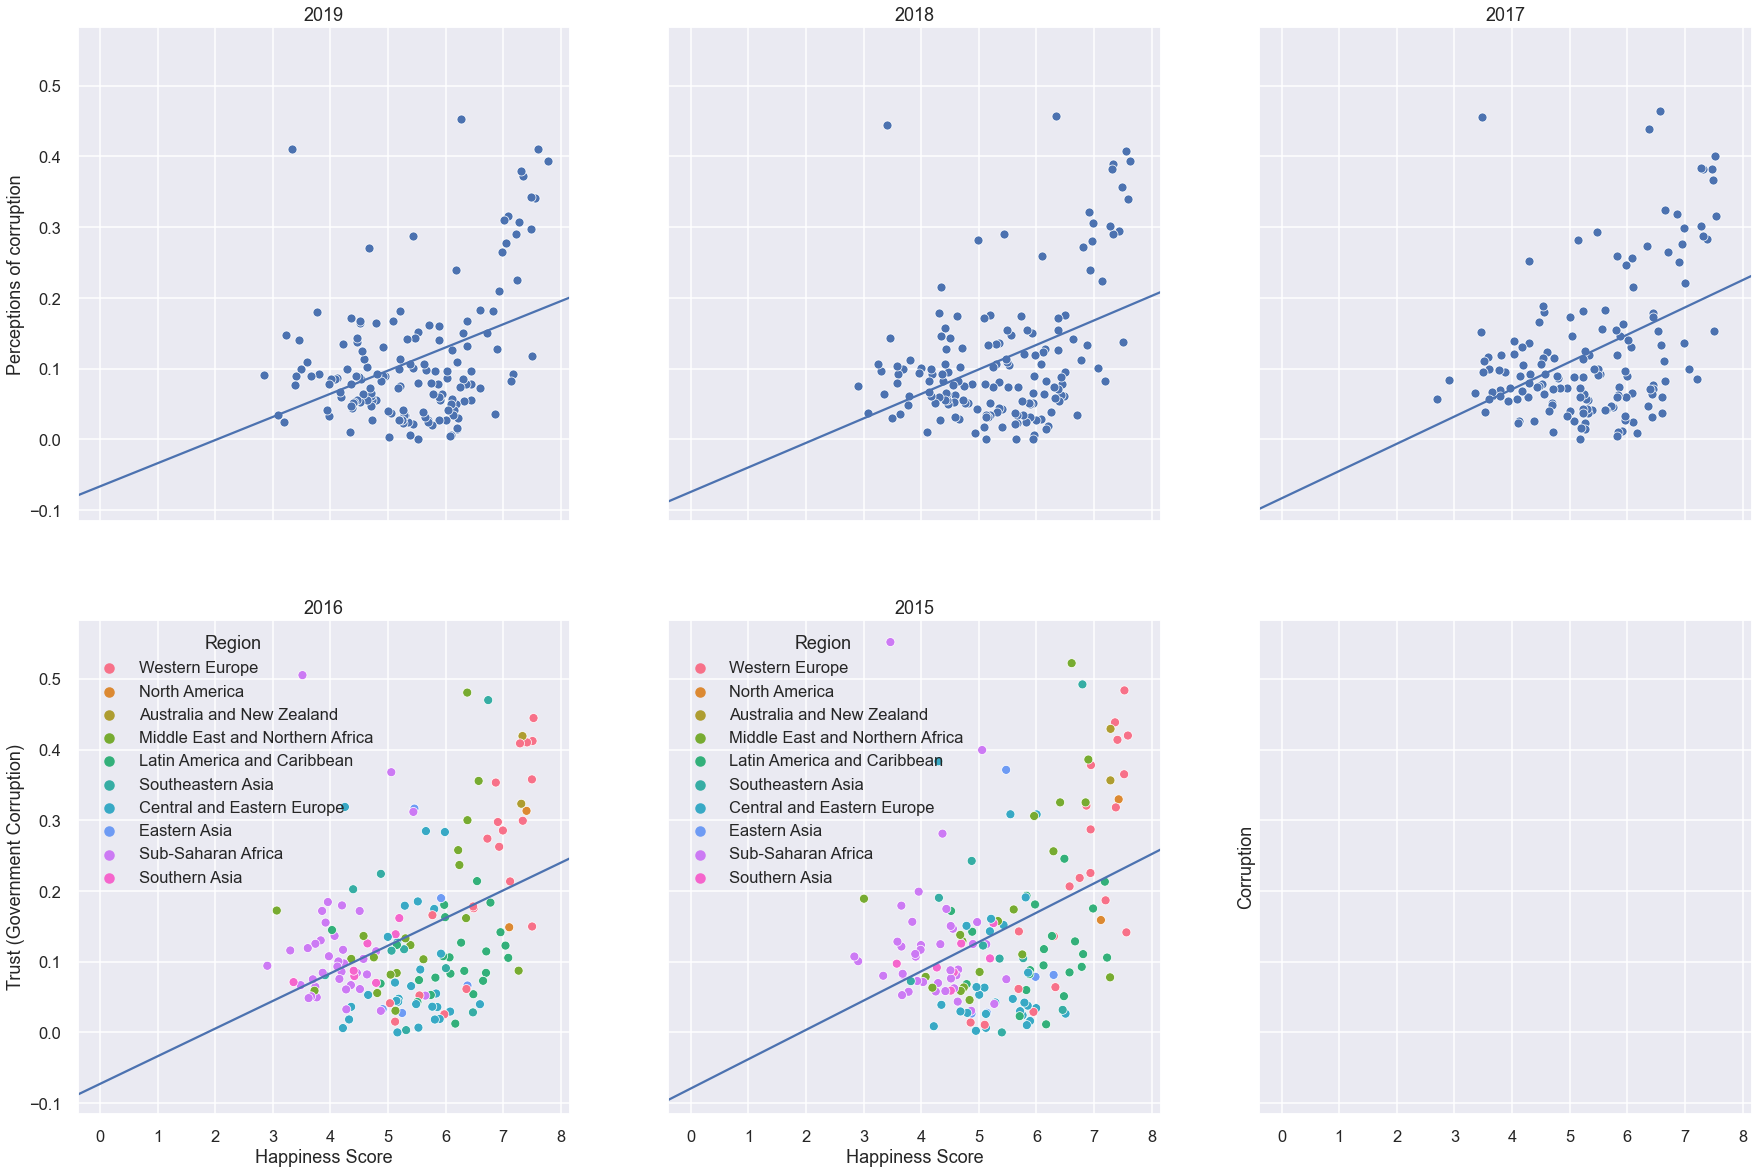

<Figure size 576x396 with 0 Axes>

In [212]:
graph_happ_cont('Corruption',['Perceptions of corruption','Perceptions of corruption','Trust..Government.Corruption.','Trust (Government Corruption)','Trust (Government Corruption)'])

Slope (as a measure of contribution): 0.015


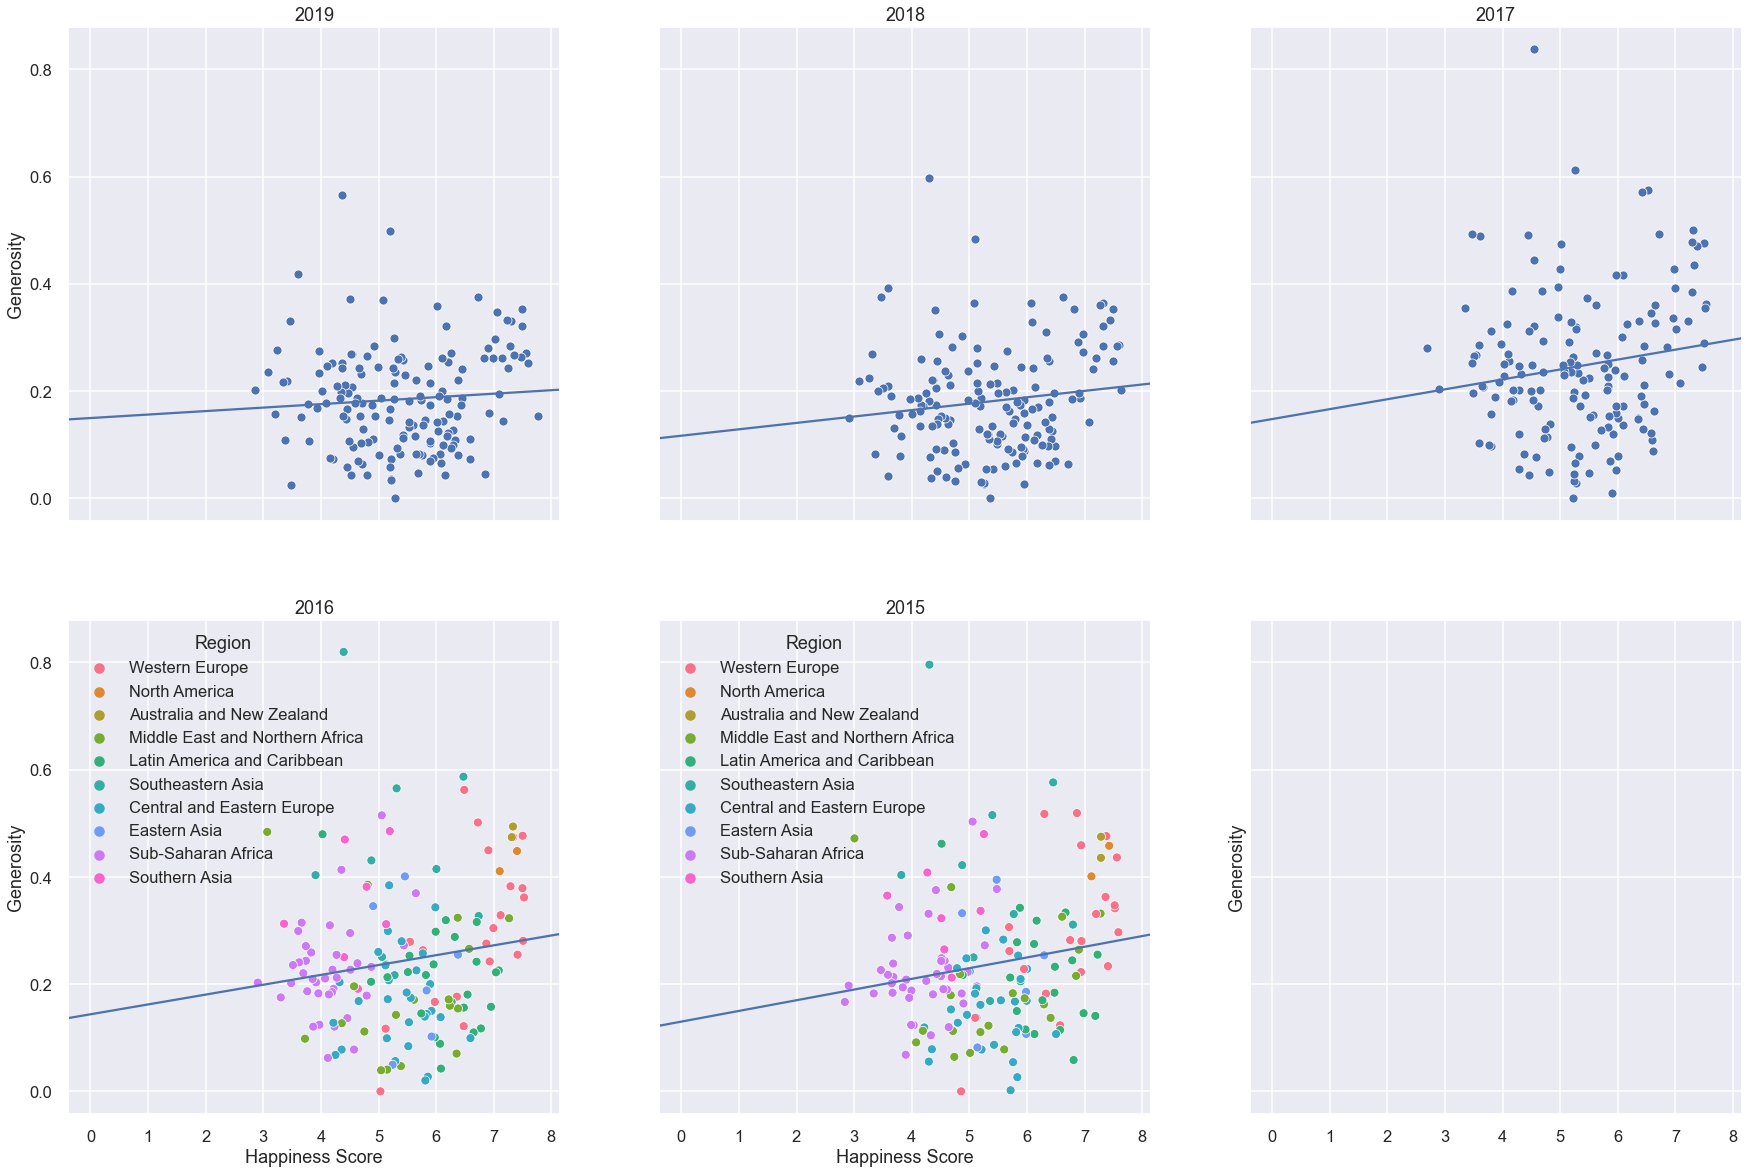

<Figure size 576x396 with 0 Axes>

In [213]:
graph_happ_cont('Generosity',['Generosity']*5)